# Tutorial: gwaslab

- In this tutorial, we will briefly show:
    - the core functions in gwaslab for sumstats QC, standardization and harmonization. 
    - examples of visualization, including Manhattan plots, Q-Q plots and regional plots.

- This jupyter notebook can be downloaded from https://github.com/Cloufield/gwaslab/tree/main/examples/1_main_tutorial.
- Please note that the processed reference datasets are currently hosted on Dropbox. 

## Download sample data

- Using a jupyter notebook, we first download a real GWAS sumsatts dataset as our sample dataset.
- The dataset we will use as an example is the sumstats of type 2 diabetes from BBJ (K. Suzuki et al., Nature Genetics. 51, 379–386 (2019).)
- File size: 261M

First make a directory and then download the sumstats (supposing our working directory is `1_main_tutorial`)

In [1]:
!mkdir ../0_sample_data
!wget -O ../0_sample_data/t2d_bbj.txt.gz http://jenger.riken.jp/14/

mkdir: cannot create directory ‘../0_sample_data’: File exists
--2024-12-23 11:20:39--  http://jenger.riken.jp/14/
Resolving jenger.riken.jp (jenger.riken.jp)... 134.160.84.25
Connecting to jenger.riken.jp (jenger.riken.jp)|134.160.84.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 274187574 (261M) [text/plain]
Saving to: ‘../0_sample_data/t2d_bbj.txt.gz’

../0_sample_data/t2 100%[===================>] 261.49M  23.1MB/s    in 12s     

2024-12-23 11:20:55 (22.5 MB/s) - ‘../0_sample_data/t2d_bbj.txt.gz’ saved [274187574/274187574]



Sometimes the link is not stable. You can also download from alternative source: 

`!wget -O ../0_sample_data/t2d_bbj.txt.gz https://www.dropbox.com/s/5vp93eq0gtsm92n/t2d_bbj.txt.gz?dl=1`

## Import gwaslab package

gwaslab can be installed using pip 

In [1]:
!pip install "gwaslab==3.5.4"

If you installed gwaslab from pip, simply run the command to import the package:

In [2]:
import gwaslab as gl

Or if you want to use the latest version from github (beta version), you can clone the repository and import the package by inserting your package path into the system path like:

In [1]:
import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl

In [3]:
gl.show_version()

2024/12/23 11:48:01 GWASLab v3.5.4 https://cloufield.github.io/gwaslab/
2024/12/23 11:48:01 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com


## Loading data into gwaslab Sumstats

Let's import the raw sumstats into the `gwaslab.Sumstats` Object by specifying the necessary columns.

Note: you can either specify `eaf` (effect allele frequency) or `neaf` (non-effect allele frequency), if `neaf` is specified, it will be converted to `eaf` when loading the sumstats.In this sumstats, Frq is neaf.

In [4]:
mysumstats = gl.Sumstats("../0_sample_data/t2d_bbj.txt.gz",
             snpid="SNP",
             chrom="CHR",
             pos="POS",
             ea="ALT",
             nea="REF",
             neaf="Frq",
             beta="BETA",
             se="SE",
             p="P",
             direction="Dir",
             n="N",
             sep="\t")

2024/12/23 11:48:06 GWASLab v3.5.4 https://cloufield.github.io/gwaslab/
2024/12/23 11:48:06 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
2024/12/23 11:48:06 Start to initialize gl.Sumstats from file :../0_sample_data/t2d_bbj.txt.gz
2024/12/23 11:48:20  -Reading columns          : Frq,P,SNP,POS,ALT,SE,N,Dir,REF,CHR,BETA
2024/12/23 11:48:20  -Renaming columns to      : EAF,P,SNPID,POS,EA,SE,N,DIRECTION,NEA,CHR,BETA
2024/12/23 11:48:20  -Current Dataframe shape : 12557761  x  11
2024/12/23 11:48:20  -Initiating a status column: STATUS ...
2024/12/23 11:48:20  #WARNING! Version of genomic coordinates is unknown...
2024/12/23 11:48:22  -NEAF is specified...
2024/12/23 11:48:22  -Checking if 0<= NEAF <=1 ...
2024/12/23 11:48:23  -Converted NEAF to EAF.
2024/12/23 11:48:23  -Removed 0 variants with bad NEAF.
2024/12/23 11:48:23 Start to reorder the columns...v3.5.4
2024/12/23 11:48:23  -Current Dataframe shape : 12557761 x 12 ; Memory usage: 1102.40 MB
2024/12/23 11:4

Sumstats are stored in `Sumstats.data` as a pandas.DataFrame, you can check the data like: 

In [5]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:725932_G_A,1,725932,G,A,0.9960,-0.0737,0.1394,0.5970,166718,-?+-,9999999
1,1:725933_A_G,1,725933,G,A,0.0040,0.0737,0.1394,0.5973,166718,+?-+,9999999
2,1:737801_T_C,1,737801,C,T,0.0051,0.0490,0.1231,0.6908,166718,+?-+,9999999
3,1:749963_T_TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.2846,166718,-?++,9999999
4,1:751343_T_A,1,751343,T,A,0.8593,0.0172,0.0156,0.2705,166718,-?++,9999999
...,...,...,...,...,...,...,...,...,...,...,...,...
12557756,X:154874837_A_G,X,154874837,G,A,0.7478,-0.0064,0.0117,0.5840,191764,-+-+,9999999
12557757,X:154875192_GTACTC_G,X,154875192,GTACTC,G,0.2525,0.0071,0.0122,0.5612,191764,+-+-,9999999
12557758,X:154879115_A_G,X,154879115,G,A,0.7463,-0.0070,0.0122,0.5646,191764,-+-+,9999999
12557759,X:154880669_T_A,X,154880669,T,A,0.2558,0.0071,0.0122,0.5618,191764,+-+-,9999999


- For details on gwaslab Sumstats Object, see: https://cloufield.github.io/gwaslab/SumstatsObject/

## Infer genome build

In case, you do not know the build. gwaslab can infer it based on hapmap3 SNPs.
For details, see: https://cloufield.github.io/gwaslab/InferBuild/

In [6]:
mysumstats.infer_build()

2024/12/23 11:48:24 Start to infer genome build version using hapmap3 SNPs...v3.5.4
2024/12/23 11:48:24  -Current Dataframe shape : 12557761 x 12 ; Memory usage: 1102.40 MB
2024/12/23 11:48:24 Start to infer genome build version using hapmap3 SNPs...
2024/12/23 11:48:24  -Loading Hapmap3 variants data...
2024/12/23 11:48:25  -CHR:POS will be used for matching...
2024/12/23 11:48:35  -Matching variants for hg19: num_hg19 =  1092441
2024/12/23 11:48:35  -Matching variants for hg38: num_hg38 =  15997
2024/12/23 11:48:35  -Since num_hg19 >> num_hg38, assigning genome build hg19...
2024/12/23 11:48:41 Finished inferring genome build version using hapmap3 SNPs.


## Create Manhattan plots and Q-Q plots

The first thing you want to check is probably the Manhattan and Q-Q plots for your sumstats. 

gwaslab will conduct a minimal QC for sumstats when plotting.

2024/12/23 11:48:41 Start to create MQQ plot...v3.5.4:
2024/12/23 11:48:41  -Genomic coordinates version: 19...
2024/12/23 11:48:41  -Genome-wide significance level to plot is set to 5e-08 ...
2024/12/23 11:48:41  -Raw input contains 12557761 variants...
2024/12/23 11:48:41  -MQQ plot layout mode is : mqq
2024/12/23 11:48:43 Finished loading specified columns from the sumstats.
2024/12/23 11:48:43 Start data conversion and sanity check:
2024/12/23 11:48:44  -Removed 0 variants with nan in CHR or POS column ...
2024/12/23 11:48:44  -Removed 0 variants with CHR <=0...
2024/12/23 11:48:45  -Removed 0 variants with nan in P column ...
2024/12/23 11:48:45  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2024/12/23 11:48:46  -Sumstats P values are being converted to -log10(P)...
2024/12/23 11:48:47  -Sanity check: 0 na/inf/-inf variants will be removed...
2024/12/23 11:48:48  -Converting data above cut line...
2024/12/23 11:48:48  -Maximum -log10(P

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7f2cc9357f10>)

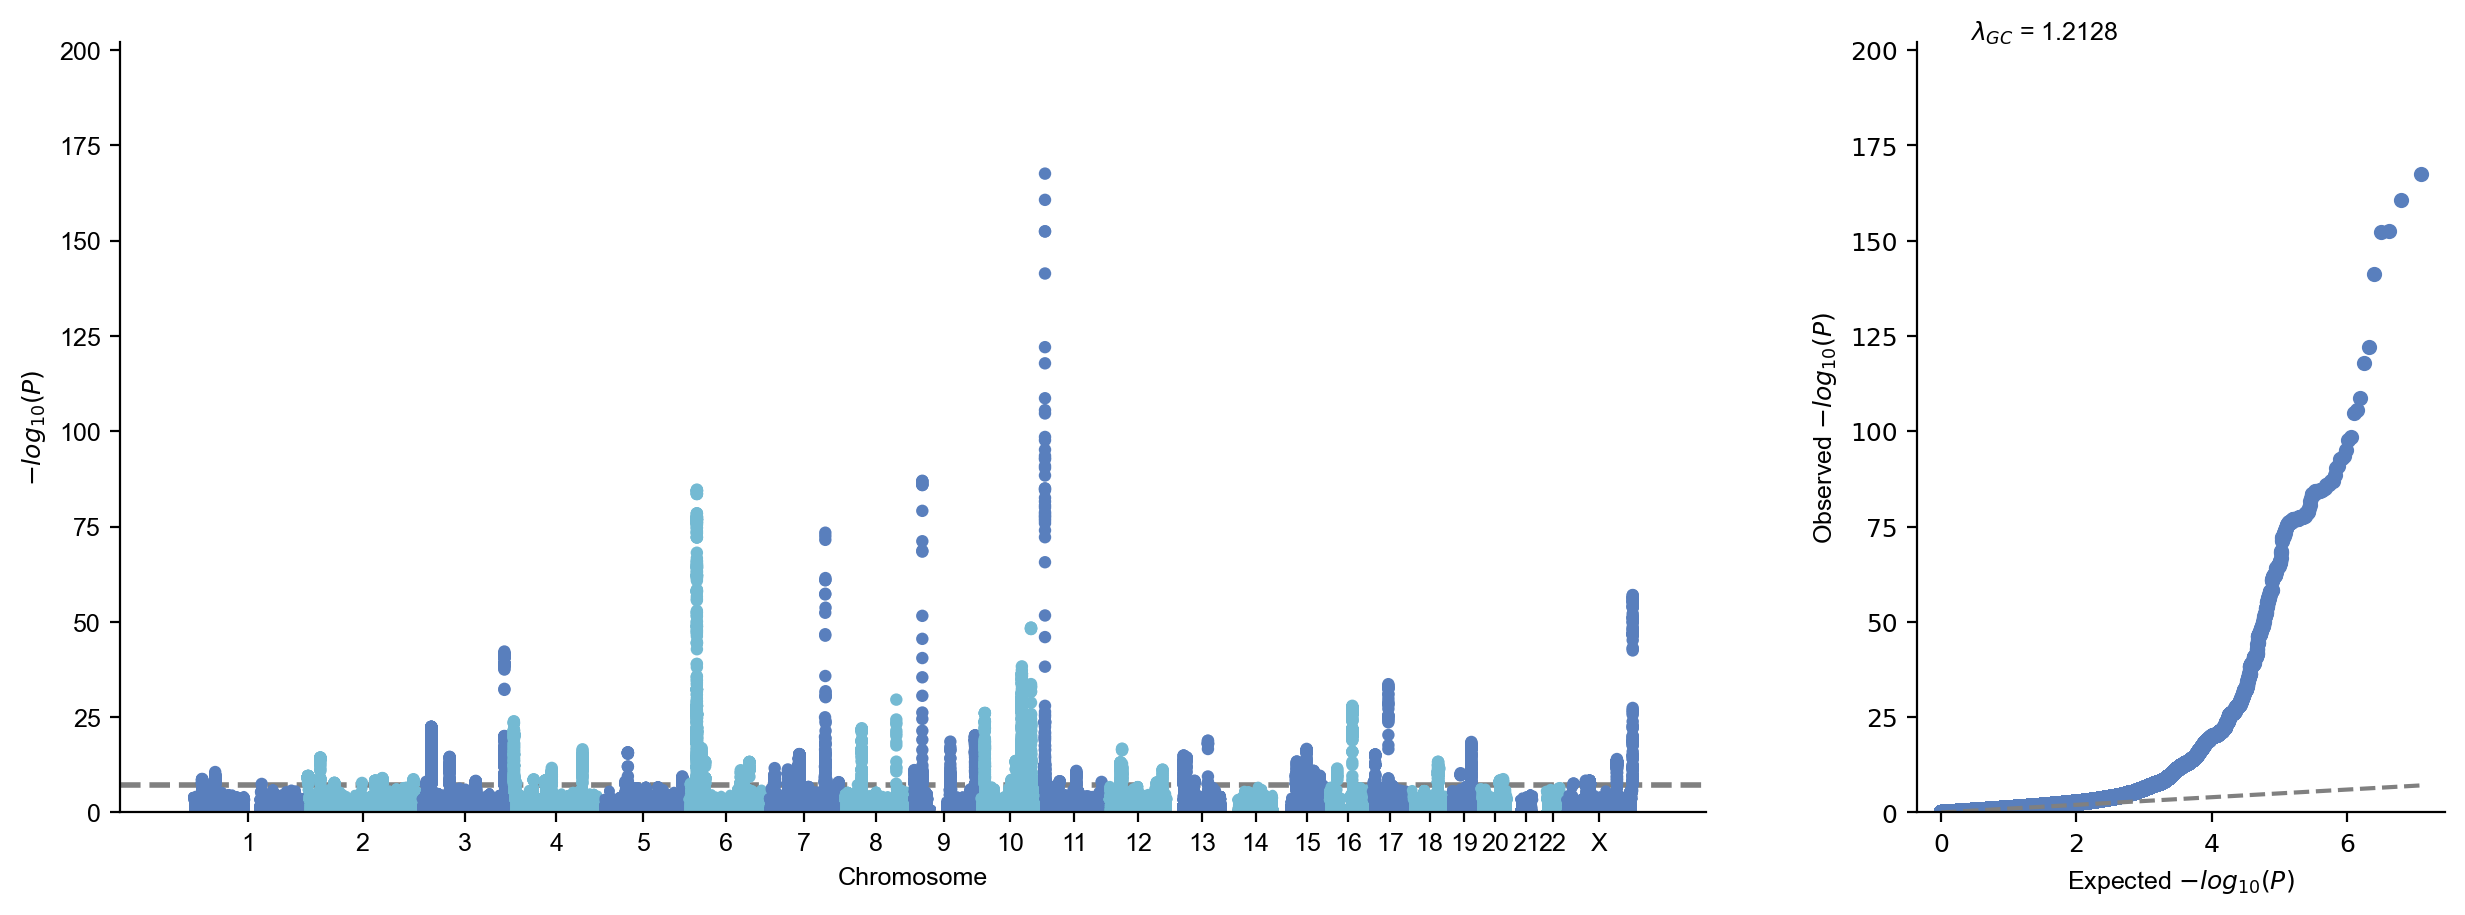

In [7]:
mysumstats.plot_mqq()

Using `.plot_mqq()`, you can easily plot the Manhattan and QQ plot, but the plots without any manipulations are not really informative in this case, and plotting all points takes a relatively long time. The most significant locus dwarfed other less significant loci. To adjust the plot, gwaslab provides a wide range of options for customization. For example, we can use `skip` and `cut` :

- skip : skip variants with MLOG10P < `skip` for faster plotting speed
- cut : rescale the MLOG10P values when MLOG10P > `cut`  

2024/12/23 11:50:38 Start to create MQQ plot...v3.5.4:
2024/12/23 11:50:38  -Genomic coordinates version: 19...
2024/12/23 11:50:38  -Genome-wide significance level to plot is set to 5e-08 ...
2024/12/23 11:50:38  -Raw input contains 12557761 variants...
2024/12/23 11:50:38  -MQQ plot layout mode is : mqq
2024/12/23 11:50:41 Finished loading specified columns from the sumstats.
2024/12/23 11:50:41 Start data conversion and sanity check:
2024/12/23 11:50:41  -Removed 0 variants with nan in CHR or POS column ...
2024/12/23 11:50:42  -Removed 0 variants with CHR <=0...
2024/12/23 11:50:42  -Removed 0 variants with nan in P column ...
2024/12/23 11:50:42  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2024/12/23 11:50:43  -Sumstats P values are being converted to -log10(P)...
2024/12/23 11:50:43  -Sanity check: 0 na/inf/-inf variants will be removed...
2024/12/23 11:50:44  -Converting data above cut line...
2024/12/23 11:50:44  -Maximum -log10(P

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7f2cc9357f10>)

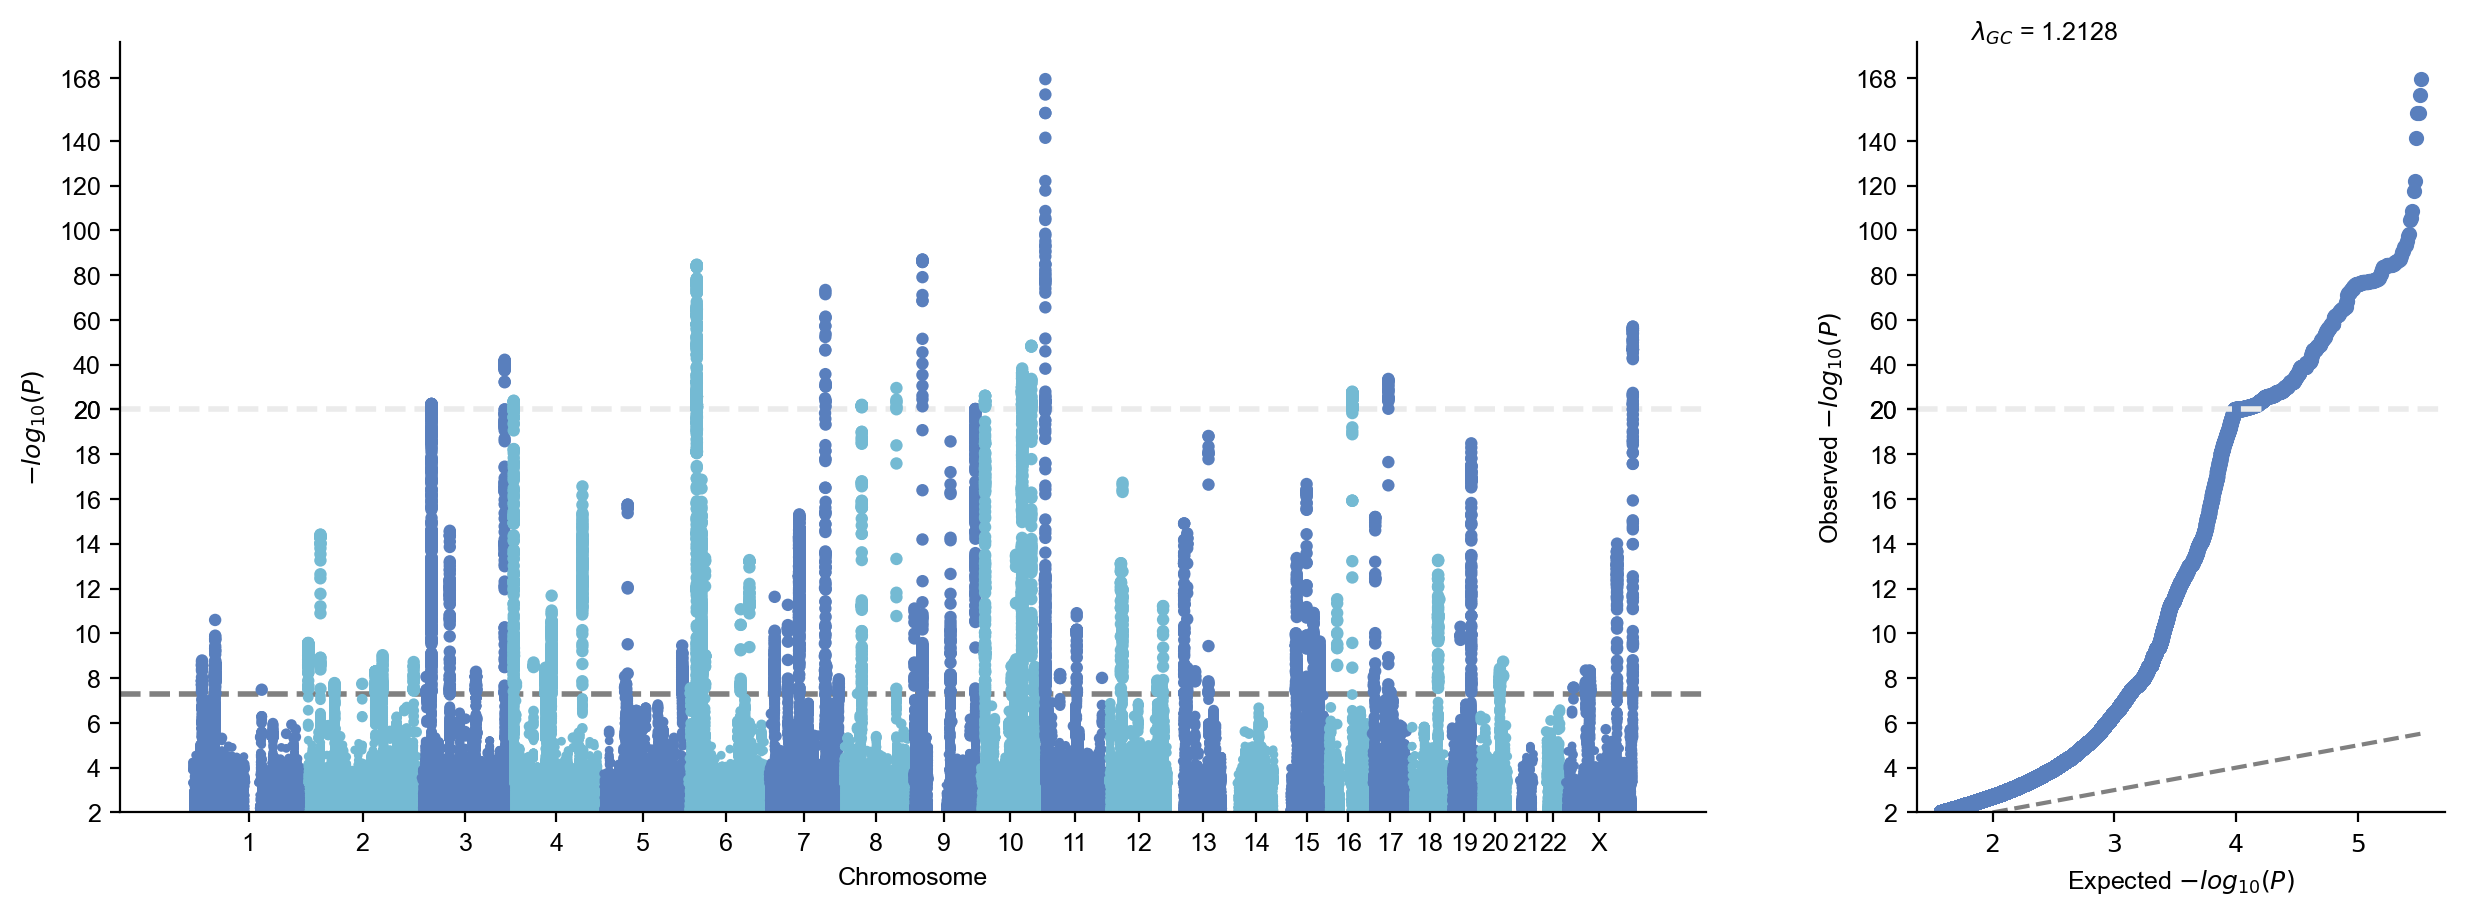

In [8]:
mysumstats.plot_mqq(skip=2, cut=20)

Looks better now. But what if we want to annotate some of the most significant loci (for example, lead variants with MLOG10P>30) and only plot Manhattan plot?

2024/12/23 11:50:48 Start to create MQQ plot...v3.5.4:
2024/12/23 11:50:48  -Genomic coordinates version: 19...
2024/12/23 11:50:48  -Genome-wide significance level to plot is set to 5e-08 ...
2024/12/23 11:50:48  -Raw input contains 12557761 variants...
2024/12/23 11:50:48  -MQQ plot layout mode is : m
2024/12/23 11:50:51 Finished loading specified columns from the sumstats.
2024/12/23 11:50:51 Start data conversion and sanity check:
2024/12/23 11:50:51  -Removed 0 variants with nan in CHR or POS column ...
2024/12/23 11:50:52  -Removed 0 variants with CHR <=0...
2024/12/23 11:50:52  -Removed 0 variants with nan in P column ...
2024/12/23 11:50:53  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2024/12/23 11:50:53  -Sumstats P values are being converted to -log10(P)...
2024/12/23 11:50:54  -Sanity check: 0 na/inf/-inf variants will be removed...
2024/12/23 11:50:55  -Converting data above cut line...
2024/12/23 11:50:55  -Maximum -log10(P) 

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7f2cc9357f10>)

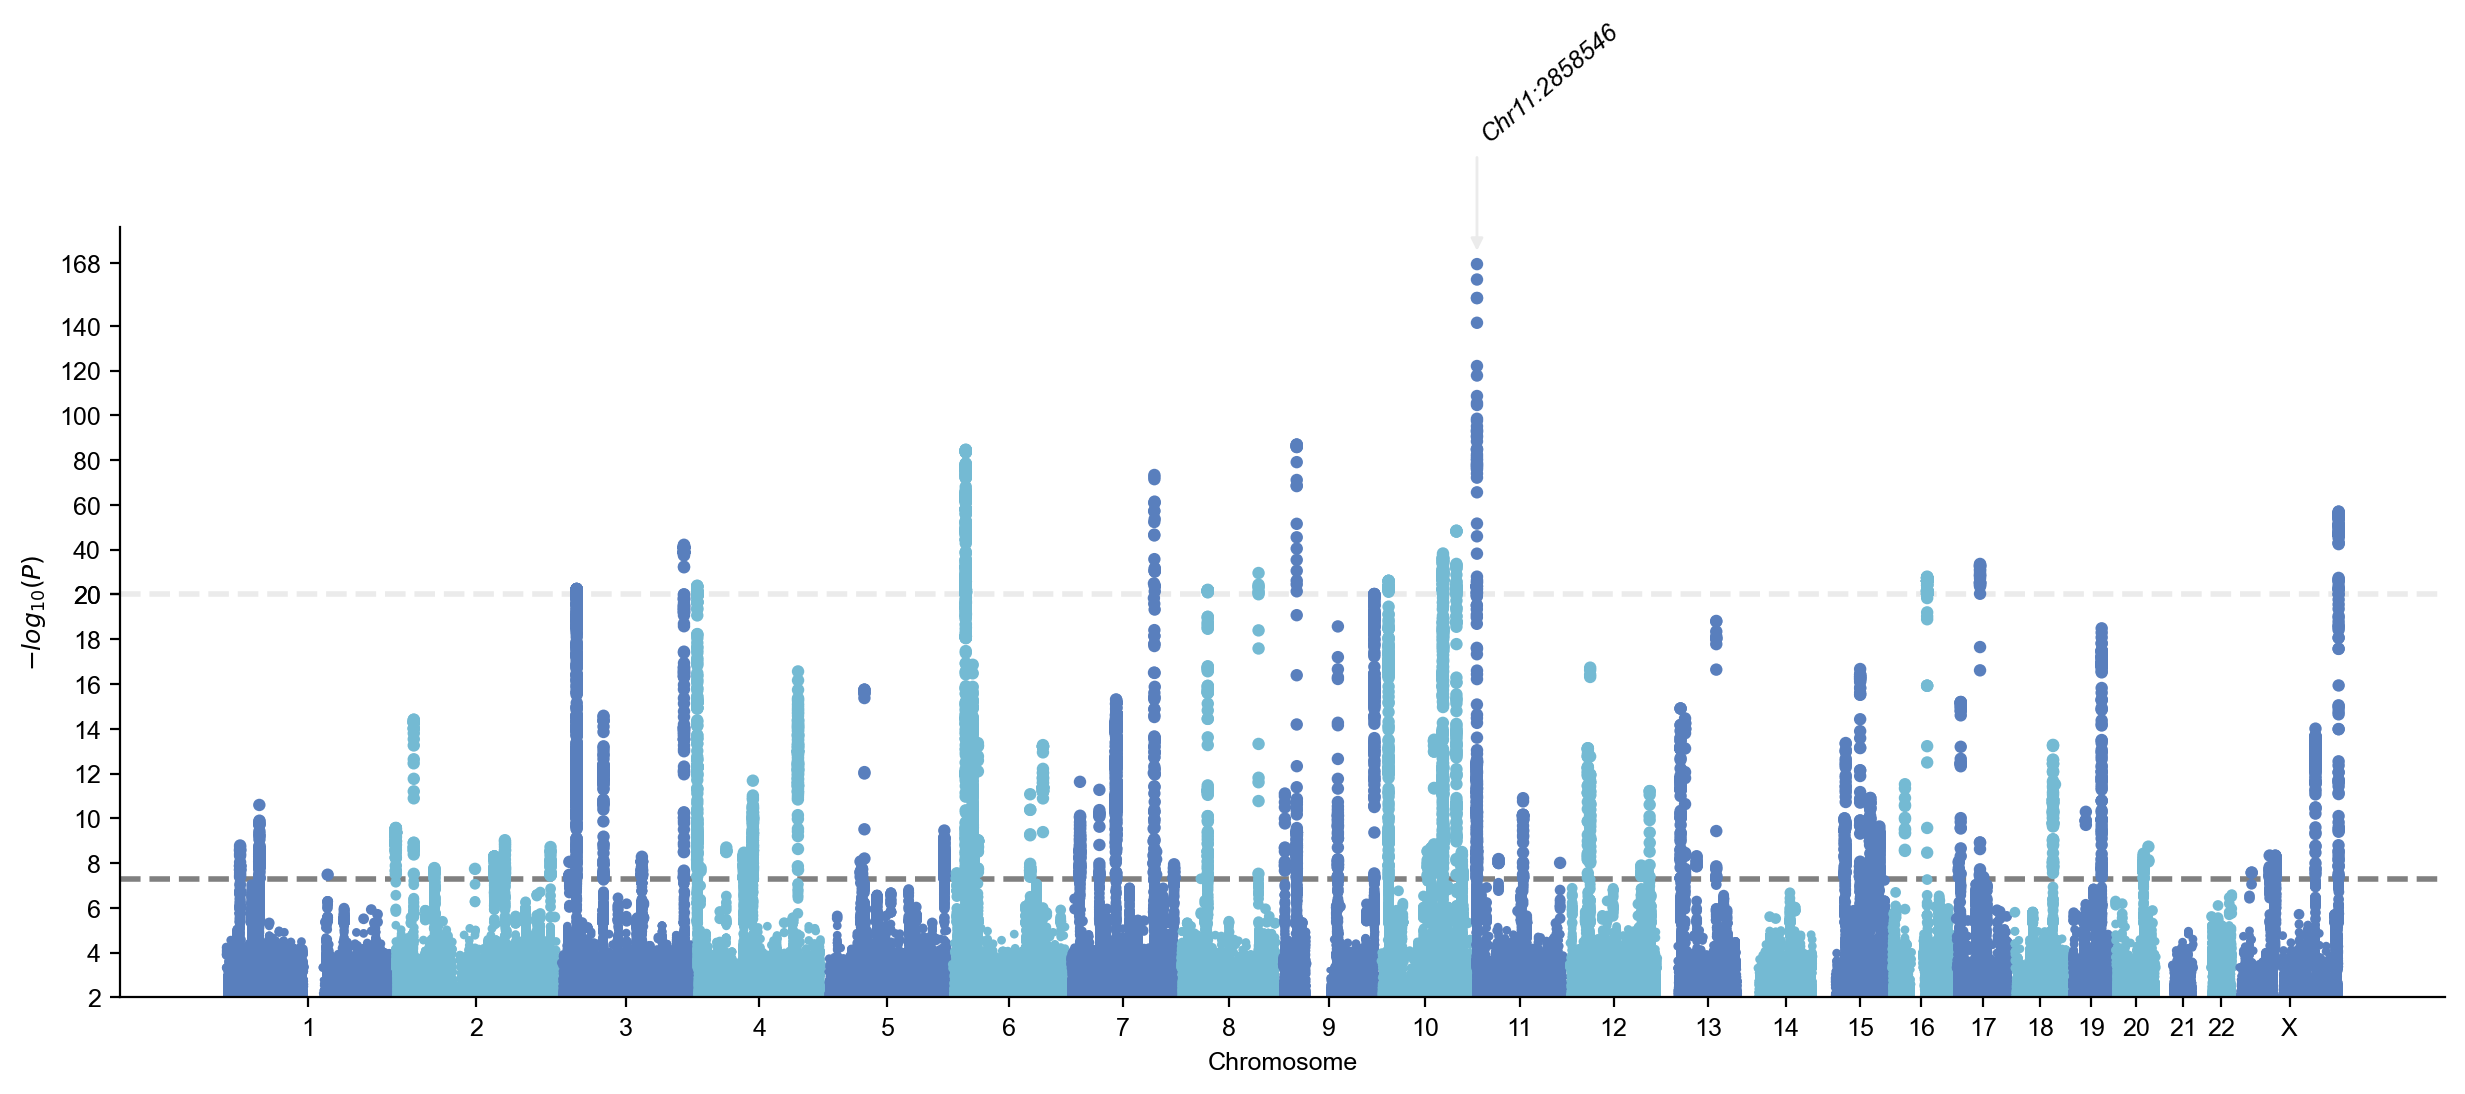

In [9]:
mysumstats.plot_mqq(skip=2, cut=20, mode="m", anno=True, sig_level_lead=1e-30)

gwaslab supports a wide range of customizable options. For details on other options for Manhattan and Q-Q plots, see: https://cloufield.github.io/gwaslab/Visualization/

## Standardization & QC : `.basic_check()`

It is needed to check variant ID (SNPID), rsID, chromosome(CHR), basepair position(POS), alleles (EA and NEA) and statistics first before any manipulations or analysis. gwaslab provides a all-in-one function for this, `.basic_check()`.

Note: Sometimes you need do this before plotting if the sumstats are not in a standard format.

In [10]:
#check SNPID,rsID,CHR,POS,EA, NEA and statistics
mysumstats.basic_check()

2024/12/23 11:50:57 Start to check SNPID/rsID...v3.5.4
2024/12/23 11:50:57  -Current Dataframe shape : 12557761 x 12 ; Memory usage: 1102.40 MB
2024/12/23 11:50:57  -Checking SNPID data type...
2024/12/23 11:50:57  -Converting SNPID to pd.string data type...
2024/12/23 11:50:58  -Checking if SNPID is CHR:POS:NEA:EA...(separator: - ,: , _)
2024/12/23 11:51:05 Finished checking SNPID/rsID.
2024/12/23 11:51:06 Start to fix chromosome notation (CHR)...v3.5.4
2024/12/23 11:51:06  -Current Dataframe shape : 12557761 x 12 ; Memory usage: 1102.40 MB
2024/12/23 11:51:06  -Checking CHR data type...
2024/12/23 11:51:07  -Variants with standardized chromosome notation: 12228970
2024/12/23 11:51:08  -Variants with fixable chromosome notations: 328791
2024/12/23 11:51:08  -No unrecognized chromosome notations...
2024/12/23 11:51:09  -Identifying non-autosomal chromosomes : X, Y, and MT ...
2024/12/23 11:51:10  -Identified  328791  variants on sex chromosomes...
2024/12/23 11:51:11  -Standardizing se

In [11]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:725932_G_A,1,725932,G,A,0.9960,-0.0737,0.1394,0.5970,166718,-?+-,1960099
1,1:725933_A_G,1,725933,G,A,0.0040,0.0737,0.1394,0.5973,166718,+?-+,1960099
2,1:737801_T_C,1,737801,C,T,0.0051,0.0490,0.1231,0.6908,166718,+?-+,1960099
3,1:749963_T_TAA,1,749963,TAA,T,0.8374,0.0213,0.0199,0.2846,166718,-?++,1960399
4,1:751343_T_A,1,751343,T,A,0.8593,0.0172,0.0156,0.2705,166718,-?++,1960099
...,...,...,...,...,...,...,...,...,...,...,...,...
12557756,X:154874837_A_G,23,154874837,G,A,0.7478,-0.0064,0.0117,0.5840,191764,-+-+,1960099
12557757,X:154875192_GTACTC_G,23,154875192,GTACTC,G,0.2525,0.0071,0.0122,0.5612,191764,+-+-,1960399
12557758,X:154879115_A_G,23,154879115,G,A,0.7463,-0.0070,0.0122,0.5646,191764,-+-+,1960099
12557759,X:154880669_T_A,23,154880669,T,A,0.2558,0.0071,0.0122,0.5618,191764,+-+-,1960099


By checking the log, we can see that the sumstats look good. But we still found several variants that were not normalized. gwaslab fixed the position and alleles for the un-normalized indels. And gwaslab standardizes the notation for chromosome X to 23.

In fact, `.basic_check()` is a wrapper of the following basic functions, you can also use these separately.

- mysumstats.fix_ID()
- mysumstats.fix_chr()
- mysumstats.fix_pos()
- mysumstats.fix_allele()
- mysumstats.check_sanity()
- mysumstats.check_data_consistency()
- mysumstats.normalize_allele()
- mysumstats.remove_dup()

For other options, see: https://cloufield.github.io/gwaslab/Standardization/

## Extract lead variants : get_lead()

Let's extract the lead variants in each significant loci to check our data.

The significant loci are detected based on a sliding window (default window size: `windowsizekb=500` kb)

By specifying `anno=True` , gwaslab will also annotate the lead variant with its nearest gene names and distance.

**Note**: GWASLab default genome build version is `build="19"` (GRCh37/hg19), you can change it to `build="38"` (GRCh38/hg38) when needed.

**Note**: GWASLab will download reference files when you run it for the first time. In this case, `ensembl_hg19_gtf_protein_coding` was downloaded and processed automatically.

In [12]:
mysumstats.get_lead(anno=True)

2024/12/23 11:52:10 Start to extract lead variants...v3.5.4
2024/12/23 11:52:10  -Current Dataframe shape : 12557761 x 12 ; Memory usage: 1020.66 MB
2024/12/23 11:52:10  -Processing 12557761 variants...
2024/12/23 11:52:10  -Significance threshold : 5e-08
2024/12/23 11:52:10  -Sliding window size: 500  kb
2024/12/23 11:52:12  -Using P for extracting lead variants...
2024/12/23 11:52:12  -Found 9461 significant variants in total...
2024/12/23 11:52:12  -Identified 89 lead variants!
2024/12/23 11:52:12  -Annotating variants using references:ensembl
2024/12/23 11:52:12  -Annotating variants using references based on genome build:19
2024/12/23 11:52:12 Start to annotate variants with nearest gene name(s)...
2024/12/23 11:52:12  -Assigning Gene name using ensembl_hg19_gtf for protein coding genes
2024/12/23 11:52:14 Finished annotating variants with nearest gene name(s) successfully!
2024/12/23 11:52:14 Finished extracting lead variants.


,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS,LOCATION,GENE
96739,1:22068326_A_G,1,22068326,G,A,0.7550,0.0621,0.0103,1.629000e-09,191764,++++,1960099,0,USP48
213860,1:51103268_T_C,1,51103268,C,T,0.7953,-0.0802,0.0120,2.519000e-11,191764,----,1960099,0,FAF1
534095,1:154309595_TA_T,1,154309595,TA,T,0.0947,-0.0915,0.0166,3.289000e-08,191764,----,1960399,0,ATP8B2
969974,2:640986_CACAT_C,2,640986,C,CACAT,0.9006,-0.0946,0.0150,2.665000e-10,191764,----,1960399,26349,TMEM18
1091807,2:27734972_G_A,2,27734972,G,A,0.5605,0.0691,0.0088,3.897000e-15,191764,++++,1960099,0,GCKR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12272930,X:21569920_A_G,23,21569920,G,A,0.3190,0.0423,0.0076,2.616000e-08,191764,++++,1960099,0,CNKSR2
12341406,X:48724648_CAA_C,23,48724648,C,CAA,0.6260,-0.0602,0.0103,4.576000e-09,191764,----,1960399,26082,TIMM17B
12350767,X:57170781_A_AT,23,57170781,AT,A,0.3003,-0.0447,0.0076,4.583000e-09,191764,----,1960399,-6723,SPIN2A
12469290,X:117915163_T_TA,23,117915163,TA,T,0.5560,0.0548,0.0071,9.818000e-15,191764,++++,1960399,0,IL13RA1


We extracted a total of 89 lead variants with a sliding window size of 500kb!

For other options, see: https://cloufield.github.io/gwaslab/ExtractLead/

## Use the SNPID to create some highly customized mqq plot

GWASLab can create much more complicated Manhattan plots.

For example, 
- annotate the lead variants with closest gene names (threshold for annotation p<1e-20)
- annotate selected variants with user-provided texts 
- pinpoint some variants
- highlight some loci
- MAF-stratified Q-Q plot
- save as my_first_mqq_plot.png with {"dpi":400,"facecolor":"white"}

2024/12/23 11:52:14 Start to create MQQ plot...v3.5.4:
2024/12/23 11:52:14  -Genomic coordinates version: 19...
2024/12/23 11:52:14  -Genome-wide significance level to plot is set to 5e-08 ...
2024/12/23 11:52:14  -Raw input contains 12557761 variants...
2024/12/23 11:52:14  -MQQ plot layout mode is : mqq
2024/12/23 11:52:14  -Loci to highlight (#CB132D): 7:127253550_C_T,19:46166604_C_T
2024/12/23 11:52:14   -highlight_windowkb is set to:  1000  kb
2024/12/23 11:52:14  -Variants to pinpoint (green) : 9:22132729_A_G,5:176513896_C_A
2024/12/23 11:52:16 Finished loading specified columns from the sumstats.
2024/12/23 11:52:16 Start data conversion and sanity check:
2024/12/23 11:52:17  -Removed 0 variants with nan in CHR or POS column ...
2024/12/23 11:52:17  -Removed 0 variants with CHR <=0...
2024/12/23 11:52:18  -Removed 0 variants with nan in EAF column ...
2024/12/23 11:52:19  -Removed 0 variants with nan in P column ...
2024/12/23 11:52:20  -Sanity check after conversion: 0 variants

(<Figure size 6000x2000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7f2cc9357f10>)

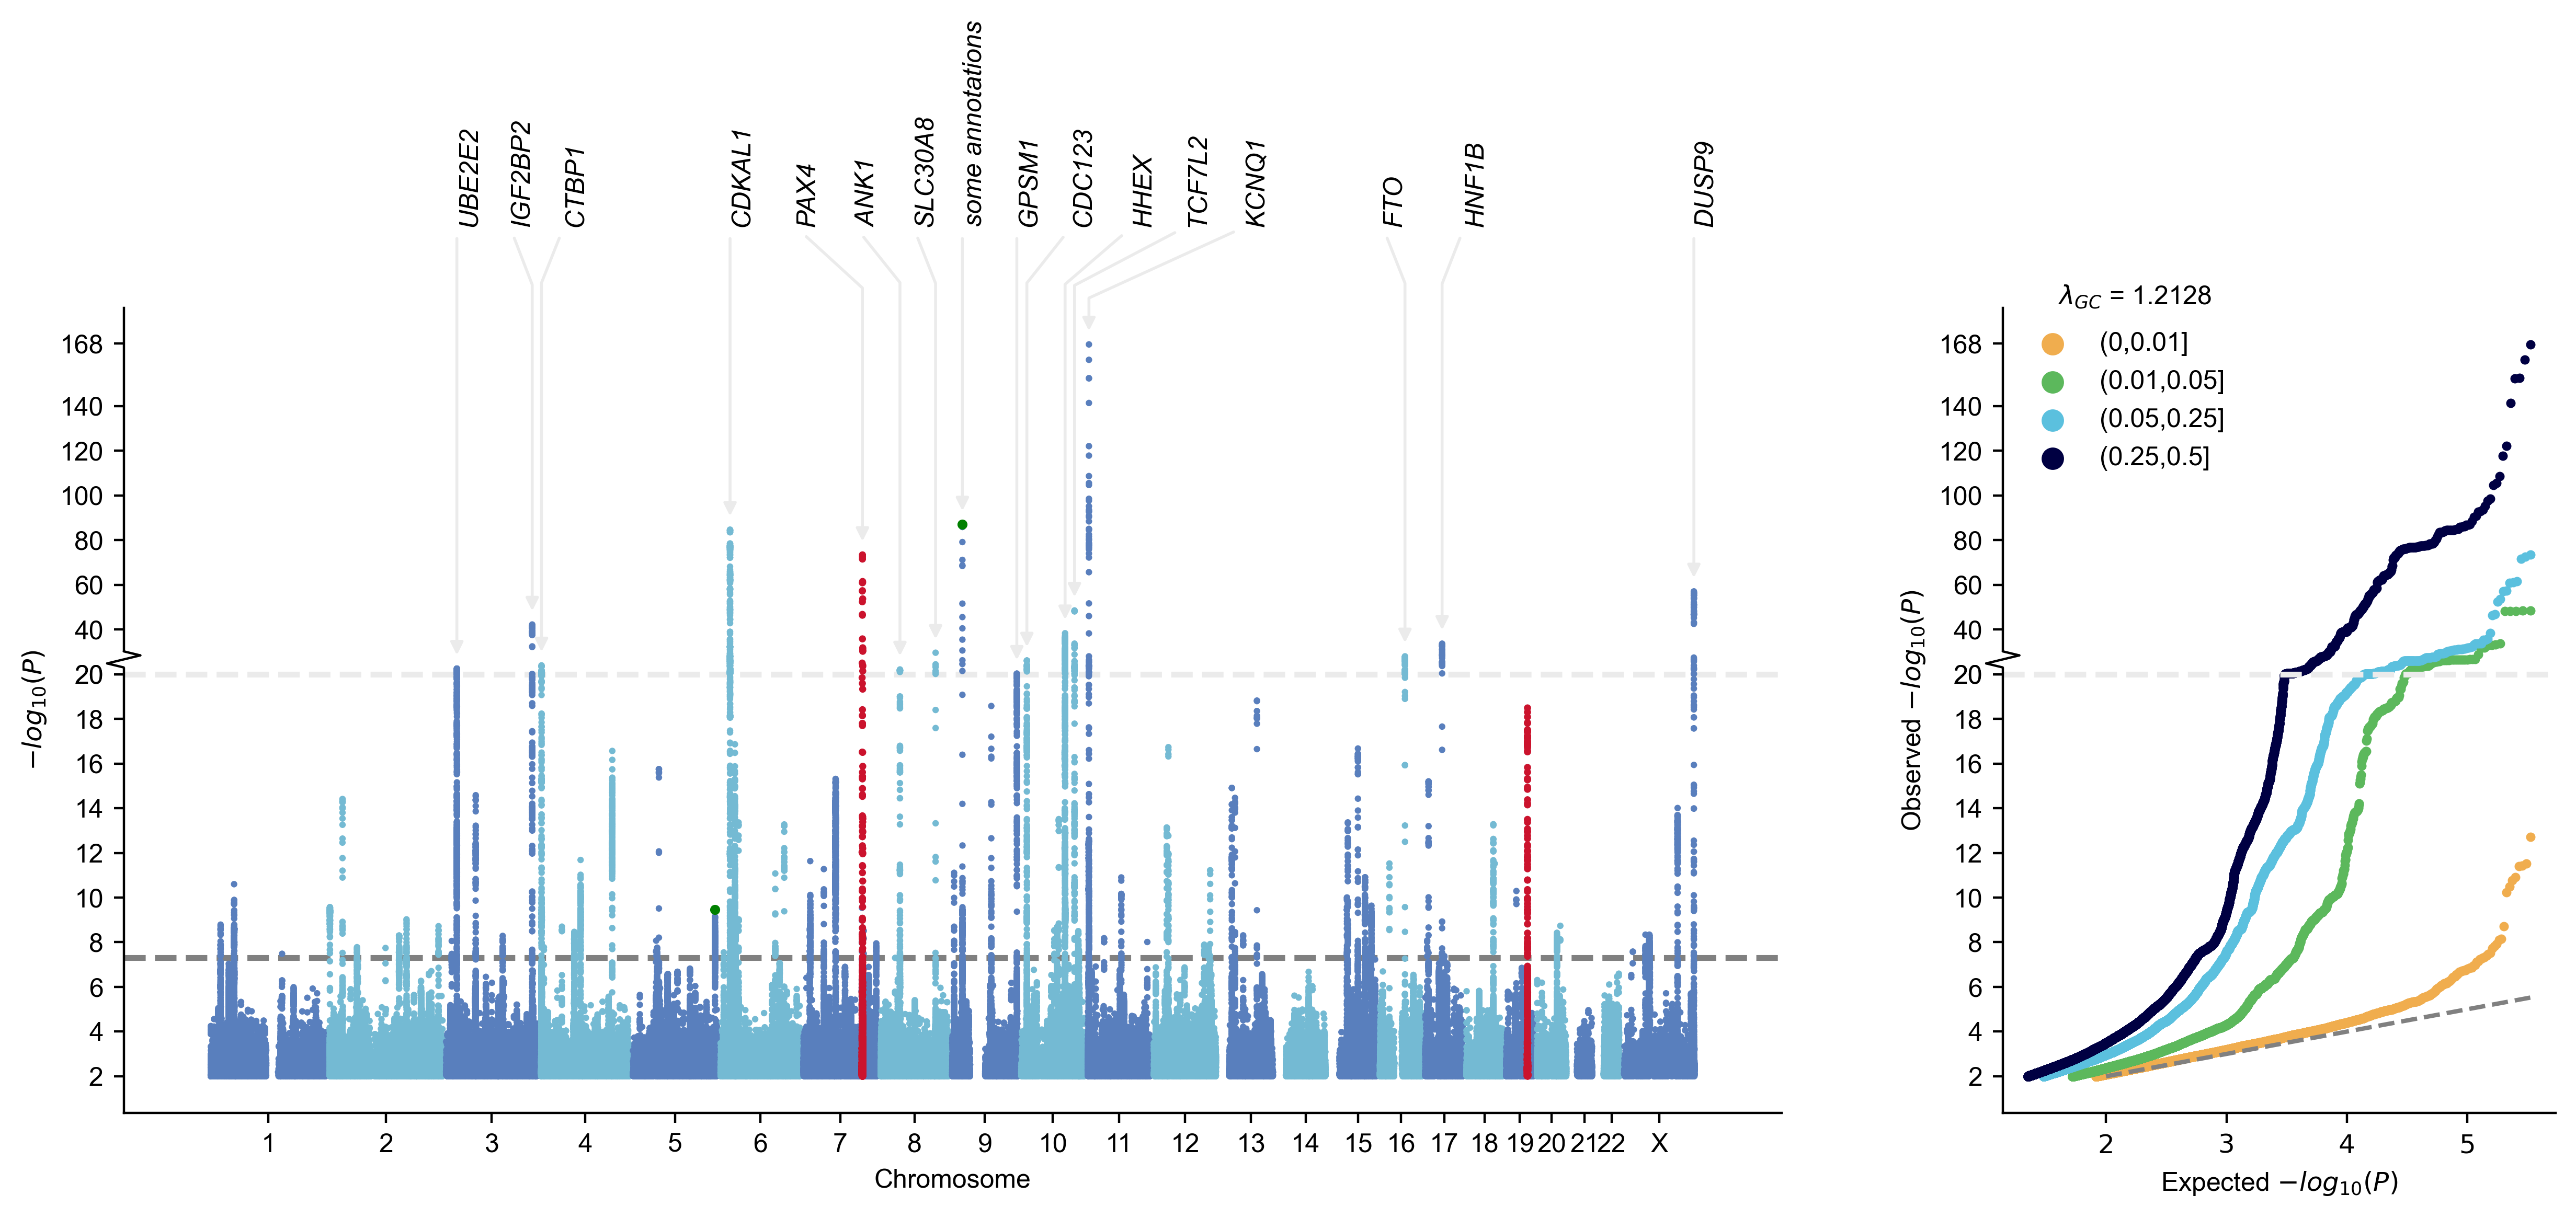

In [13]:
mysumstats.plot_mqq(mode="mqq",
                    cut=20,
                    skip=2,
                    anno="GENENAME",
                    sig_level_lead=1e-20,
                    anno_alias={"9:22132729_A_G":"some annotations"},
                    anno_style="expand",
                    xpad=0.01,
                    pinpoint=["9:22132729_A_G","5:176513896_C_A"], 
                    pinpoint_color="green",
                    highlight=["7:127253550_C_T","19:46166604_C_T"],
                    highlight_windowkb =1000,
                    stratified=True,
                    jagged=True,
                    marker_size=(5,5),
                    figargs={"figsize":(15,5),"dpi":300},
                    save="my_first_mqq_plot.png", 
                    save_args={"dpi":400,"facecolor":"white"})

For details, see: https://cloufield.github.io/gwaslab/Visualization/

## Quick regional plot without LD-information

gwaslab can also plot regional plots with or with out LD reference files.

For details, see: https://cloufield.github.io/gwaslab/RegionalPlot/

We first create a regional plot without references by specifying `mode` and `region`.

2024/12/23 11:52:32 Start to create MQQ plot...v3.5.4:
2024/12/23 11:52:32  -Genomic coordinates version: 19...
2024/12/23 11:52:32  -Genome-wide significance level to plot is set to 5e-08 ...
2024/12/23 11:52:32  -Raw input contains 12557761 variants...
2024/12/23 11:52:32  -MQQ plot layout mode is : r
2024/12/23 11:52:32  -Region to plot : chr7:126253550-128253550.
2024/12/23 11:52:33  -Extract SNPs in region : chr7:126253550-128253550...
2024/12/23 11:52:34  -Extract SNPs in specified regions: 8087
2024/12/23 11:52:34 Finished loading specified columns from the sumstats.
2024/12/23 11:52:34 Start data conversion and sanity check:
2024/12/23 11:52:34  -Removed 0 variants with nan in CHR or POS column ...
2024/12/23 11:52:34  -Removed 0 variants with CHR <=0...
2024/12/23 11:52:34  -Removed 0 variants with nan in P column ...
2024/12/23 11:52:34  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2024/12/23 11:52:34  -Sumstats P values are bein

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2024/12/23 11:52:59  -plotting gene track..
2024/12/23 11:52:59  -plotting genes: 14..
2024/12/23 11:52:59  -plotting exons: 675..
2024/12/23 11:52:59  -Finished plotting gene track..
2024/12/23 11:52:59 Finished creating MQQ plot successfully!
2024/12/23 11:52:59 Start to extract variants for annotation...
2024/12/23 11:52:59  -Found 1 significant variants with a sliding window size of 500 kb...
2024/12/23 11:52:59 Finished extracting variants for annotation...
2024/12/23 11:52:59 Start to process figure arts.
2024/12/23 11:52:59  -Processing X labels...
2024/12/23 11:52:59  -Processing Y labels...
2024/12/23 11:52:59  -Processing Y tick lables...
2024/12/23 11:52:59  -Processing Y labels...
2024/12/23 11:52:59  -Processing lines...
2024/12/23 11:52:59 Finished processing figure arts.
2024/12/23 11:52:59 Start to annotate variants...
2024/12/23 11:52:59  -Skip annotating
2024/12/23 11:52:59 Finished annotating variants.
2024/12/23 11:52:59 Start to save figure...
2024/12/23 11:52:59  

(<Figure size 3000x2000 with 3 Axes>, <gwaslab.g_Log.Log at 0x7f2cc9357f10>)

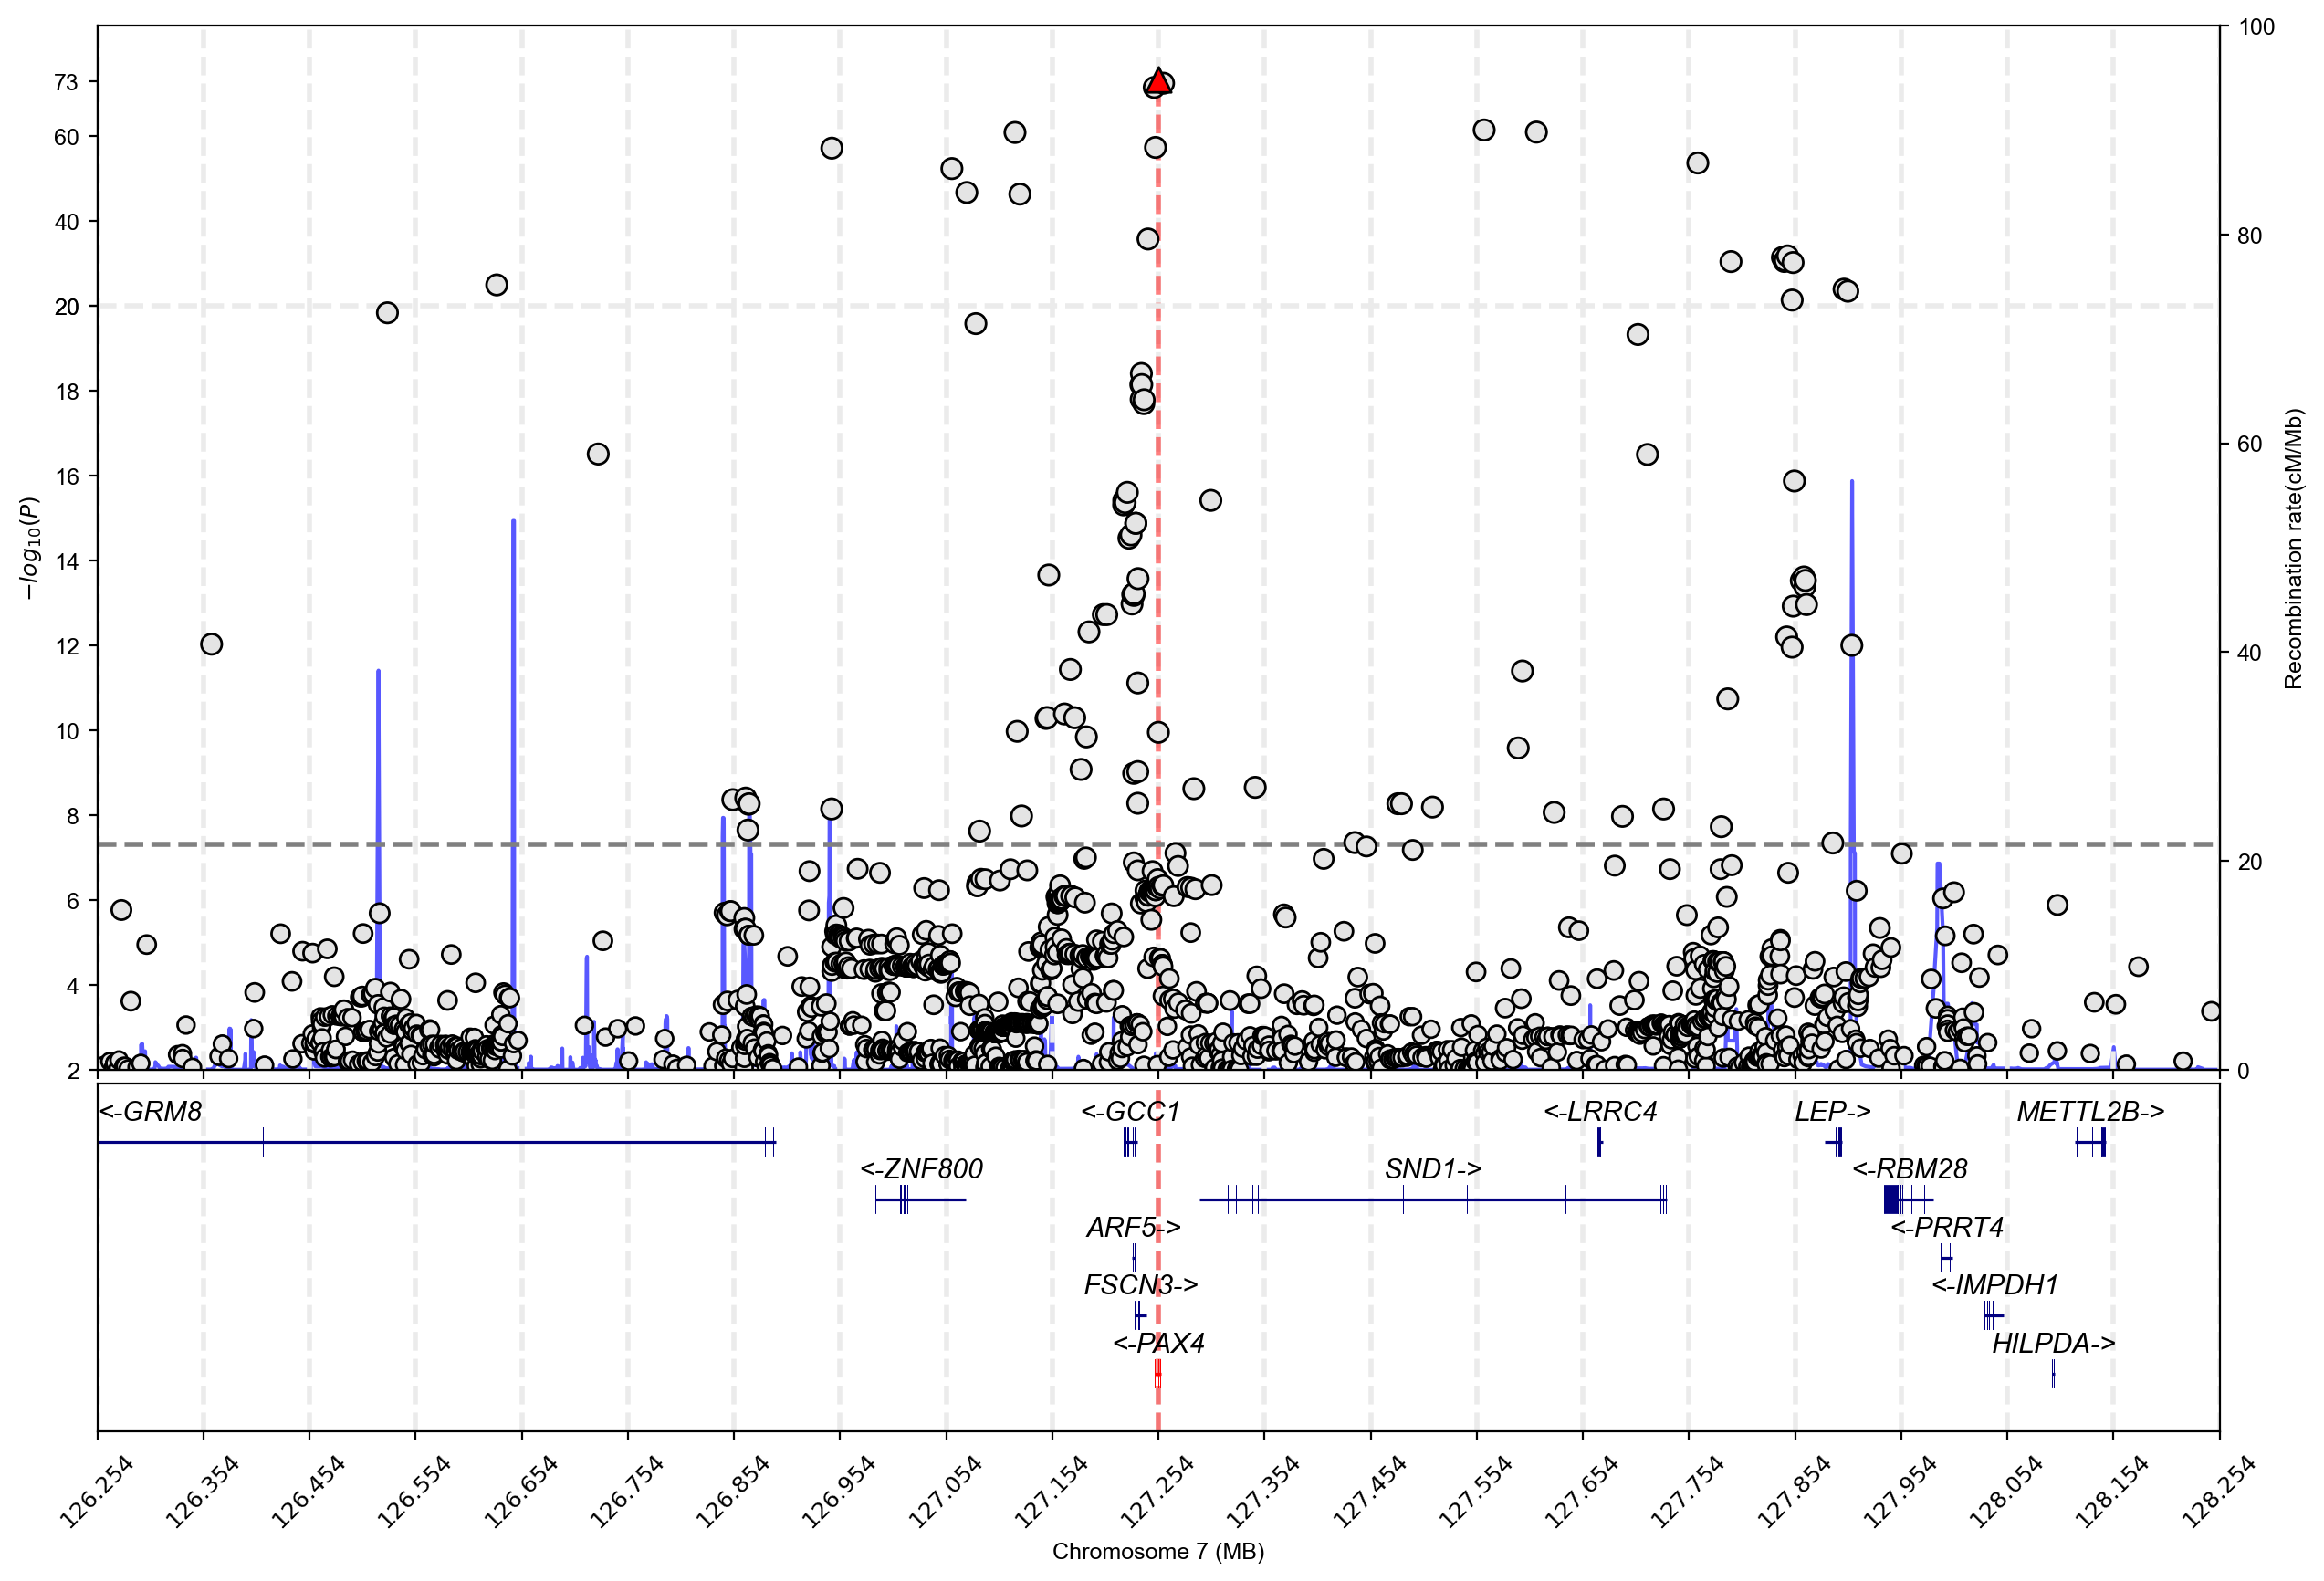

In [14]:
mysumstats.plot_mqq(mode="r",skip=2,cut=20, region=(7,126253550,128253550),region_grid=True)

## Reference file downloading

Full regional plot will require user-provided vcf or preprocessed vcf files:
(e.g 1000 Genomes project, see Reference: https://cloufield.github.io/gwaslab/Reference/)

gwaslab also provide pre-processed 1KG datasets.

### check available reference from gwaslab

Update the available reference list first if needed

In [15]:
# gl.update_available_ref()

In [16]:
gl.check_available_ref()

2024/12/23 11:53:00 Start to check available reference files...
2024/12/23 11:53:00  - 1kg_eas_hg19  :  https://www.dropbox.com/s/lztaxqhy2o6dpxw/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1
2024/12/23 11:53:00  - 1kg_eas_hg19_md5  :  c8c97434843c0da3113fc06879ead472
2024/12/23 11:53:00  - 1kg_eas_hg19_tbi  :  https://www.dropbox.com/s/k9klefl8m9fcfo1/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1
2024/12/23 11:53:00  - 1kg_eur_hg19  :  https://www.dropbox.com/s/1nbgqshknevseks/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1
2024/12/23 11:53:00  - 1kg_eur_hg19_md5  :  734069d895009d38c2f962bfbb6fab52
2024/12/23 11:53:00  - 1kg_eur_hg19_tbi  :  https://www.dropbox.com/s/vscvkrflh6fc5a0/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1
2024/12/23 11:53:00  - 1kg_eas_hg38  :  https://www.dropbox.com/s/3dstbbb1el9r3au/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz?dl=1
2024/12/23 11:53:00  - 1kg_eas_hg38_md5  :  f45e80bca9ef7b29e6b1832e6ac15375
2024/12/23 11:53:00  - 1kg_eas_hg38_tbi  :  

{'1kg_eas_hg19': 'https://www.dropbox.com/s/lztaxqhy2o6dpxw/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1',
 '1kg_eas_hg19_md5': 'c8c97434843c0da3113fc06879ead472',
 '1kg_eas_hg19_tbi': 'https://www.dropbox.com/s/k9klefl8m9fcfo1/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1',
 '1kg_eur_hg19': 'https://www.dropbox.com/s/1nbgqshknevseks/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1',
 '1kg_eur_hg19_md5': '734069d895009d38c2f962bfbb6fab52',
 '1kg_eur_hg19_tbi': 'https://www.dropbox.com/s/vscvkrflh6fc5a0/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1',
 '1kg_eas_hg38': 'https://www.dropbox.com/s/3dstbbb1el9r3au/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz?dl=1',
 '1kg_eas_hg38_md5': 'f45e80bca9ef7b29e6b1832e6ac15375',
 '1kg_eas_hg38_tbi': 'https://www.dropbox.com/s/vwnp5vd8dcqksn4/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz.tbi?dl=1',
 '1kg_eur_hg38': 'https://www.dropbox.com/s/z0mkehg17lryapv/EUR.ALL.split_norm_af.1kg_30x.hg38.vcf.gz?dl=1',
 '1kg_eur_hg38_md5': '228d3285fa99132cc632

You can see the current available reference files (from the original source or pre-processed by gwaslab). 

### download reference using gwaslab

Select the keyword and use `download_ref` to download the files. The downloaded files will be placed in `~/.gwasalb` by default.
- `1kg_eas_hg19` : processed 1000 Genomes Project EAS samples dataset(hg19; ~2.8GB) It may take several minutes to download.

In [17]:
# ~2.8GB
#gl.download_ref("1kg_eas_hg19")

In [18]:
gl.check_downloaded_ref()

2024/12/23 11:53:00 Start to check downloaded reference files...
2024/12/23 11:53:00  -Checking the config file:/home/yunye/anaconda3/envs/gwaslab_py39/lib/python3.9/site-packages/gwaslab/data/config.json
2024/12/23 11:53:00  -Config file exists.
2024/12/23 11:53:00  -Updating config.json...
2024/12/23 11:53:00   - ucsc_genome_hg19  :  /home/yunye/.gwaslab/hg19.fa
2024/12/23 11:53:00   - ensembl_hg19_gtf  :  /home/yunye/.gwaslab/Homo_sapiens.GRCh37.87.chr.gtf.gz
2024/12/23 11:53:00   - 1kg_eas_hg19  :  /home/yunye/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz
2024/12/23 11:53:00   - 1kg_eas_hg19_tbi  :  /home/yunye/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi
2024/12/23 11:53:00   - 1kg_dbsnp151_hg19_auto  :  /home/yunye/.gwaslab/1kg_dbsnp151_hg19_auto.txt.gz
2024/12/23 11:53:00   - ensembl_hg38_gtf  :  /home/yunye/.gwaslab/Homo_sapiens.GRCh38.109.chr.gtf.gz
2024/12/23 11:53:00   - 19to38  :  /home/yunye/.gwaslab/hg19ToHg38.over.chain.gz


{'ucsc_genome_hg19': '/home/yunye/.gwaslab/hg19.fa',
 'ensembl_hg19_gtf': '/home/yunye/.gwaslab/Homo_sapiens.GRCh37.87.chr.gtf.gz',
 '1kg_eas_hg19': '/home/yunye/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz',
 '1kg_eas_hg19_tbi': '/home/yunye/.gwaslab/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi',
 '1kg_dbsnp151_hg19_auto': '/home/yunye/.gwaslab/1kg_dbsnp151_hg19_auto.txt.gz',
 'ensembl_hg38_gtf': '/home/yunye/.gwaslab/Homo_sapiens.GRCh38.109.chr.gtf.gz',
 '19to38': '/home/yunye/.gwaslab/hg19ToHg38.over.chain.gz'}

After downloading, use `get_path` to obtain the file path by specifying the keyword.

**Note**: 
- If `tabix` is available in PATH, the speed will be  will greatly improved. Otherwise, vcf files will be loaded from the head. 
- tabix: http://www.htslib.org/download/

2024/12/23 11:53:00 Start to create MQQ plot...v3.5.4:
2024/12/23 11:53:00  -Genomic coordinates version: 19...
2024/12/23 11:53:00  -Genome-wide significance level to plot is set to 5e-08 ...
2024/12/23 11:53:00  -Raw input contains 12557761 variants...
2024/12/23 11:53:00  -MQQ plot layout mode is : r
2024/12/23 11:53:00  -Region to plot : chr7:126253550-128253550.
2024/12/23 11:53:00  -Checking chromosome notations in VCF/BCF files...
2024/12/23 11:53:00  -Checking prefix for chromosomes in VCF/BCF files...
2024/12/23 11:53:00  -No prefix for chromosomes in the VCF/BCF files.
2024/12/23 11:53:01  -Extract SNPs in region : chr7:126253550-128253550...
2024/12/23 11:53:02  -Extract SNPs in specified regions: 8087
2024/12/23 11:53:02 Finished loading specified columns from the sumstats.
2024/12/23 11:53:02 Start data conversion and sanity check:
2024/12/23 11:53:02  -Removed 0 variants with nan in CHR or POS column ...
2024/12/23 11:53:02  -Removed 0 variants with CHR <=0...
2024/12/23 

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2024/12/23 11:53:29  -plotting gene track..
2024/12/23 11:53:29  -plotting genes: 14..
2024/12/23 11:53:29  -plotting exons: 675..
2024/12/23 11:53:29  -Finished plotting gene track..
2024/12/23 11:53:30 Finished creating MQQ plot successfully!
2024/12/23 11:53:30 Start to extract variants for annotation...
2024/12/23 11:53:30  -Found 1 significant variants with a sliding window size of 500 kb...
2024/12/23 11:53:30 Finished extracting variants for annotation...
2024/12/23 11:53:30 Start to process figure arts.
2024/12/23 11:53:30  -Processing X labels...
2024/12/23 11:53:30  -Processing Y labels...
2024/12/23 11:53:30  -Processing Y tick lables...
2024/12/23 11:53:30  -Processing Y labels...
2024/12/23 11:53:30  -Processing color bar...
2024/12/23 11:53:30  -Processing lines...
2024/12/23 11:53:30 Finished processing figure arts.
2024/12/23 11:53:30 Start to annotate variants...
2024/12/23 11:53:30  -Annotating using column SNPID...
2024/12/23 11:53:30  -Adjusting text positions with 

(<Figure size 3000x2000 with 4 Axes>, <gwaslab.g_Log.Log at 0x7f2cc9357f10>)

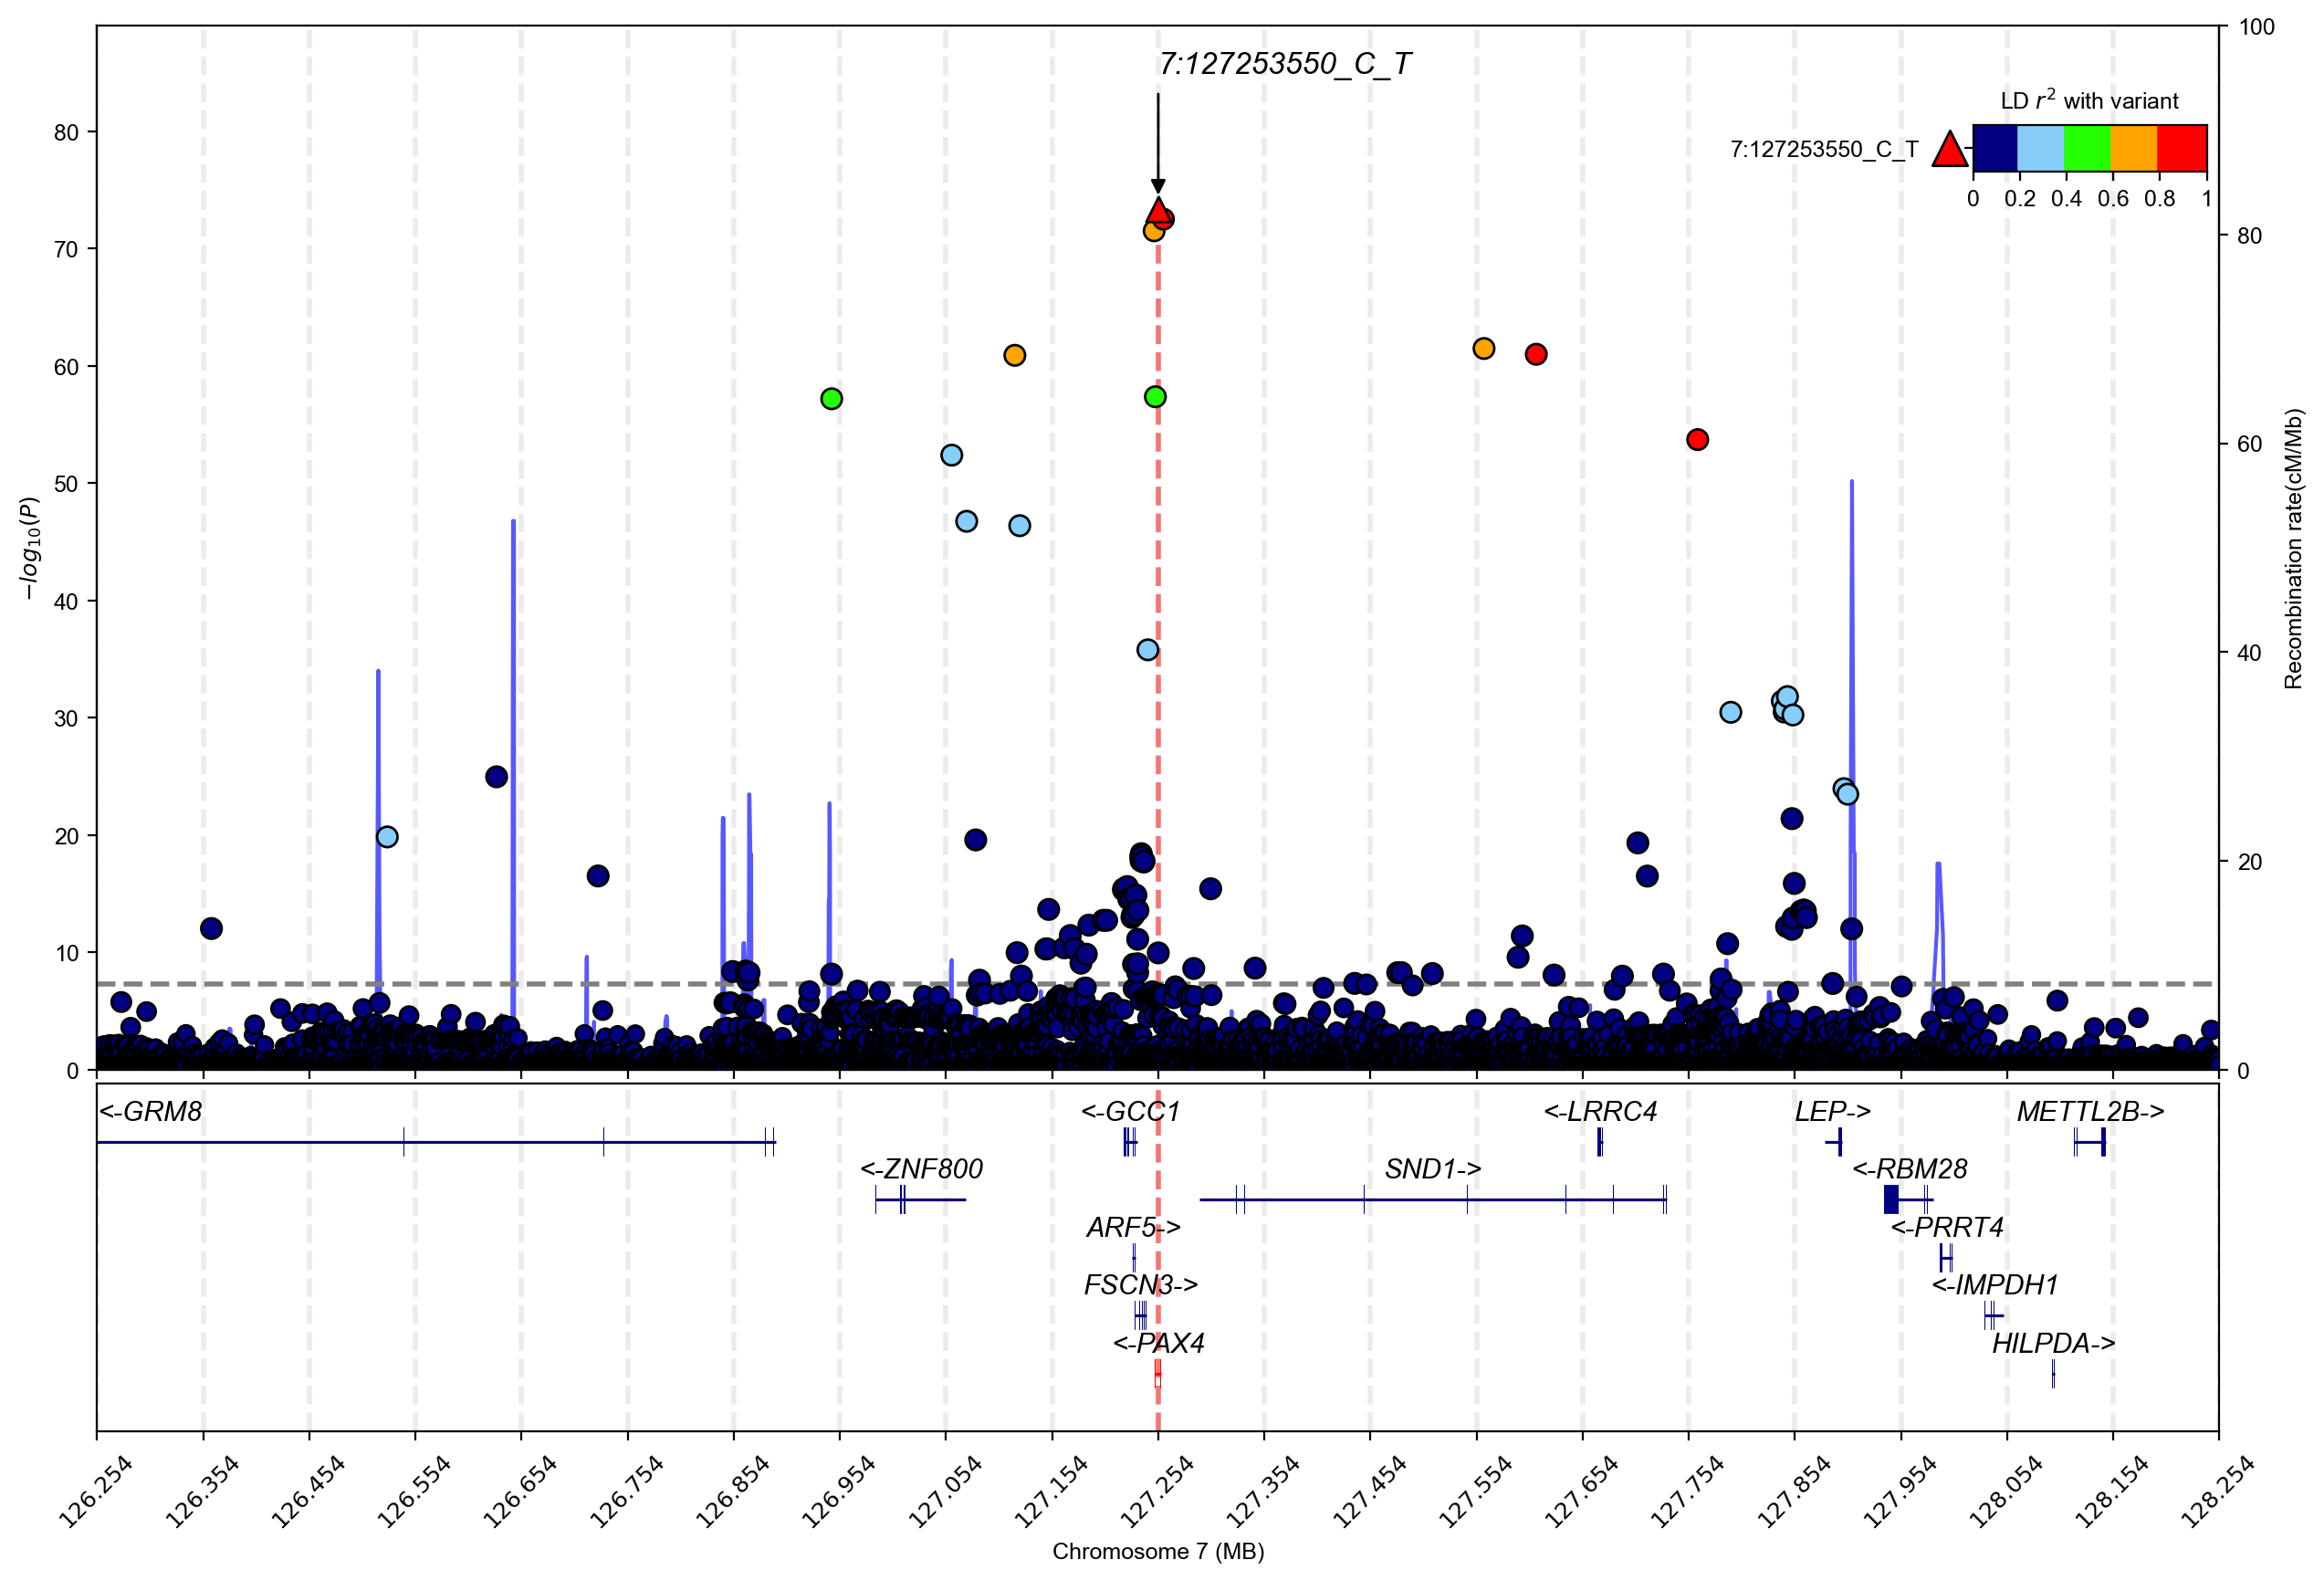

In [19]:
mysumstats.plot_mqq(mode="r",
                    region=(7,126253550,128253550),
                    region_grid=True,
                    anno="SNPID",
                    anno_args={"rotation":0,"fontsize":12},
                    vcf_path=gl.get_path("1kg_eas_hg19"))

Or you can provide your own vcf files for `vcf_path`. 

In [20]:
# mysumstats.plot_mqq(mode="r",
#                     region=(7,156538803,157538803),
#                     region_grid=True,
#                     anno=True,
#                     vcf_path="/home/yunye/mydata/d_disk/eas_1kg_af/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz")

**Note**: gwaslab default genome build version is `build="19"` (GRCh37/hg19), you can change it to `build="38"` (GRCh38/hg38) when needed. For gene tracks, default is `gtf_path="ensembl"` , you can also use `gtf_path="refseq"` (NCBA RefSeq)

## Sampling

There are more than 10 million variants in the original sumstats and it will take some time to process the entrie dataset. Let's just randomly sample 100K variants for this tutorial.

In [21]:
mysumstats.random_variants(n=100000,inplace=True,random_state=1234)

2024/12/23 11:53:30 Start to randomly select variants from the sumstats...
2024/12/23 11:53:30  -Number of variants selected from the sumstats: 100000
2024/12/23 11:53:30  -Random state (seed): 1234
2024/12/23 11:53:31 Finished sampling...


In case you don't know the genome build of the sumstats 

## Fix SNPID

You may notice that the SNPID is in `CHR:POS_REF_ALT` format. We want SNPID to be in a stadardized format `CHR:POS:REF:ALT`, we can use fix_id for this:

For other options of standardization, see: https://cloufield.github.io/gwaslab/Standardization/

In [22]:
#fixsep : fix ID separator
mysumstats.fix_id(fixsep=True)

2024/12/23 11:53:31 Start to check SNPID/rsID...v3.5.4
2024/12/23 11:53:31  -Current Dataframe shape : 100000 x 12 ; Memory usage: 35.32 MB
2024/12/23 11:53:31  -Checking SNPID data type...
2024/12/23 11:53:31  -Checking if SNPID is CHR:POS:NEA:EA...(separator: - ,: , _)
2024/12/23 11:53:33  -Replacing [_-] in SNPID with ":" ...
2024/12/23 11:53:33 Finished checking SNPID/rsID.


In [23]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
1736173,2:180784768:G:T,2,180784768,G,T,0.9978,0.0797,0.1141,0.4850,191764,-+++,1960099
258841,1:61108984:G:C,1,61108984,G,C,0.4847,-0.0095,0.0087,0.2767,191764,+--+,1960099
89268,1:20294687:G:A,1,20294687,G,A,0.7936,0.0161,0.0111,0.1484,191764,0++-,1960099
10697866,16:86560264:T:C,16,86560264,C,T,0.3114,-0.0016,0.0095,0.8663,191764,--+-,1960099
6068219,7:152311067:G:A,7,152311067,G,A,0.9977,0.1369,0.1433,0.3395,166718,+?++,1960099
...,...,...,...,...,...,...,...,...,...,...,...,...
3376277,4:105613391:C:T,4,105613391,C,T,0.9966,0.1211,0.0939,0.1974,191764,++++,1960099
5598990,7:38184549:A:T,7,38184549,T,A,0.6533,-0.0000,0.0095,0.9982,191764,+-+-,1960099
7580034,10:58897803:A:G,10,58897803,G,A,0.0096,-0.0339,0.0623,0.5860,191764,++--,1960099
10546104,16:58355232:G:A,16,58355232,G,A,0.6904,0.0083,0.0108,0.4401,191764,+-++,1960099


## Annotate rsID

rsID is assigned using two types of reference file:
- ref_rsid_tsv : tsv file for annotation of commonly used variants
- ref_rsid_vcf : vcf file for annotation of other variants

GWASLab provides preprocessed tsv files for 1KG variants (~80M), we can download the file using `.download_ref` with key words. This time we will use `1kg_dbsnp151_hg19_auto`, which is the SNPID-rsID conversion table for autosomal variants in 1KG project (hg19). This will take around a few minutes to download.

In [24]:
# 961M
#gl.download_ref("1kg_dbsnp151_hg19_auto")

In [25]:
mysumstats.assign_rsid(ref_rsid_tsv= gl.get_path("1kg_dbsnp151_hg19_auto"))

2024/12/23 11:53:33 Start to assign rsID by matching SNPID with CHR:POS:REF:ALT in the reference TSV...v3.5.4
2024/12/23 11:53:33  -Current Dataframe shape : 100000 x 12 ; Memory usage: 35.32 MB
2024/12/23 11:53:33  -Number of threads/cores to use: 1
2024/12/23 11:53:33  -Reference TSV: /home/yunye/.gwaslab/1kg_dbsnp151_hg19_auto.txt.gz
2024/12/23 11:53:33  -100000 rsID could be possibly fixed...
2024/12/23 11:53:33  -Setting block size:  5000000
2024/12/23 11:53:33  -Loading block: 0   1   2   3   4   5   6   7   8   9   10   11   12   13   14   15   
2024/12/23 11:56:09  -rsID annotation for 3266 needed to be fixed!
2024/12/23 11:56:09  -Annotated 96734 rsID successfully!
2024/12/23 11:56:09 Finished assign rsID using reference file.


- We annotated 96734  (96734 /100000 = 96.7%) variants using the conversion table.
- For the annotation of other variants (3.3%), we may need the dbSNP reference VFC file.

### Maximize the annotation

For the annotation of not-so-common variants, we can use vcf files downloaded form NCBI dbsnp (https://ftp.ncbi.nih.gov/snp/latest_release/VCF/). 

Note:
- The file size is huge (>20GB) and it might take several hours to download. (we can skip this step in this tutorial. )
- Specify `chr_dict` to match the chromosome notations in sumstats and in vcf files.

Parameters : 
- `ref_rsid_vcf`: the path to the reference rsID vcf file
- `n_cores` : number of threads to use

In [26]:
mysumstats.assign_rsid(n_cores=1,
                       ref_rsid_vcf= "/home/yunye/CommonData/Reference/ncbi_dbsnp/db155/GCF_000001405.25.gz",
                       chr_dict = gl.get_number_to_NC(build="19") )

2024/12/23 11:56:09 Start to assign rsID using reference VCF...v3.5.4
2024/12/23 11:56:09  -Current Dataframe shape : 100000 x 13 ; Memory usage: 35.32 MB
2024/12/23 11:56:09  -Number of threads/cores to use: 1
2024/12/23 11:56:09  -Reference VCF: /home/yunye/CommonData/Reference/ncbi_dbsnp/db155/GCF_000001405.25.gz
2024/12/23 11:56:09  -Assigning rsID based on CHR:POS and REF:ALT/ALT:REF...
2024/12/23 11:56:14  -rsID Annotation for 122 need to be fixed!
2024/12/23 11:56:14  -Annotated 3144 rsID successfully!
2024/12/23 11:56:14 Finished assign rsID using reference file.


After this, only 122 variants were not annotated. (122/100000 = 0.122%), mostly indels that are not available in the reference VCF.

In [27]:
mysumstats.data.loc[mysumstats.data["rsID"].isna(),:]

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS,rsID
248,2:175894098:G:AA,2,175894098,G,AA,0.6600,-0.0029,0.0095,0.76090,191764,++--,1960399,<NA>
269,X:95972533:A:AT,23,95972533,AT,A,0.2461,0.0175,0.0096,0.06804,191764,+-++,1960399,<NA>
1455,X:120283097:A:AT,23,120283097,AT,A,0.1279,-0.0144,0.0110,0.18910,191764,---+,1960399,<NA>
1803,2:153147115:C:AA,2,153147115,C,AA,0.5061,-0.0005,0.0103,0.96120,191764,-++-,1960399,<NA>
1985,X:113620243:CAAA:C,23,113620243,C,CAAA,0.2933,0.0053,0.0082,0.52150,191764,-+++,1960399,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93825,3:104431873:C:AA,3,104431873,C,AA,0.0417,-0.0328,0.0221,0.13830,191764,++--,1960399,<NA>
93840,X:18195379:CTT:C,23,18195379,C,CTT,0.1204,0.0260,0.0131,0.04715,191764,++++,1960399,<NA>
94793,8:69844929:CAAACAAAACA:C,8,69844929,C,CAAACAAAACA,0.0300,0.0332,0.0368,0.36610,191764,++++,1960399,<NA>
98581,X:97528779:TTTG:T,23,97528779,TTTG,T,0.1536,0.0007,0.0097,0.93880,191764,-++-,1960399,<NA>


Tips : The two steps can be run in a single call.

In [28]:
#mysumstats.assign_rsid(n_cores=3,
#                       ref_rsid_tsv= gl.get_path("1kg_dbsnp151_hg19_auto"),
#                       ref_rsid_vcf= "/home/yunye/CommonData/Reference/ncbi_dbsnp/ncbi_dbsnp/db155/GCF_000001405.25.gz",
#                       chr_dict = gl.get_number_to_NC(build="19") )

## Harmonization

gwaslab can harmonize the sumstats based on reference files.

- ref_seq : reference genome fasta file for allele alignment
- ref_infer : vcf file with allele frequency information for inferring strand and comparing allele frequency 
- ref_alt_freq : field in INFO of vcf file for alternative allele frequency

For details see: https://cloufield.github.io/gwaslab/Harmonization/

For reference data, see: https://cloufield.github.io/gwaslab/Reference/

We can use the refernce genome from 1000 genomes. 

http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/human_g1k_v37.fasta.gz
http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/human_g1k_v37.fasta.fai

When calling `.harmonize()`, `.basic_check()` will be called first to make sure the dataset is ready for harmonization. Since we have already performed basic_check, we set `basic_check=False` here. For `ref_infer`, we pass the downloaded vcf files for 1KG EAS and specify the field for alternative allele frequency to AF by `ref_alt_freq= "AF"`.  

In [29]:
mysumstats.harmonize(basic_check=False,
                     n_cores=3,
                     ref_seq     = "/home/yunye/.gwaslab/hg19.fa",
                     ref_infer   = gl.get_path("1kg_eas_hg19"),
                     ref_alt_freq= "AF")

2024/12/23 11:56:15 Start to check if NEA is aligned with reference sequence...v3.5.4
2024/12/23 11:56:15  -Current Dataframe shape : 100000 x 13 ; Memory usage: 35.32 MB
2024/12/23 11:56:15  -Reference genome FASTA file: /home/yunye/.gwaslab/hg19.fa
2024/12/23 11:56:15  -Loading fasta records:1  2  3  4  5  6  7  X  8  9  10  11  12  13  14  15  16  17  18  20  19  22  21  
2024/12/23 11:56:26  -Checking records
2024/12/23 11:56:26    -Building numpy fasta records from dict
2024/12/23 11:56:34    -Checking records for ( len(NEA) <= 4 and len(EA) <= 4 )
2024/12/23 11:56:35    -Checking records for ( len(NEA) > 4 or len(EA) > 4 )
2024/12/23 11:56:36  -Finished checking records
2024/12/23 11:56:38  -Variants allele on given reference sequence :  21243
2024/12/23 11:56:38  -Variants flipped :  15106
2024/12/23 11:56:38   -Raw Matching rate :  36.35%
2024/12/23 11:56:38  #WARNING! Matching rate is low, please check if the right reference genome is used.
2024/12/23 11:56:38  -Variants infer

In [30]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:875643:C:G,rs7411115,1,875643,G,C,0.7290,0.0147,0.0130,0.258600,166718,+?+-,1960089
1,1:928416:G:A,rs111754459,1,928416,G,A,0.8637,-0.0113,0.0142,0.423300,191764,++-+,1960000
2,1:933045:C:T,rs189213898,1,933045,G,A,0.9913,-0.0008,0.0704,0.991500,166718,+?-+,1960020
3,1:1019158:G:A,rs142369888,1,1019158,T,C,0.0110,0.1189,0.0613,0.052510,166718,+?++,1960020
4,1:1023310:T:C,rs11260589,1,1023310,T,C,0.9146,-0.0202,0.0182,0.265600,191764,---+,1960010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,X:153882706:C:T,rs3829775,23,153882706,C,T,0.9875,0.0017,0.0526,0.973600,166718,-?++,1960080
99996,X:154087726:C:T,rs112922881,23,154087726,C,T,0.9257,-0.0414,0.0151,0.006171,191764,-+-+,1960080
99997,X:154126990:T:C,rs28370221,23,154126990,C,T,0.0763,-0.0085,0.0132,0.519500,191764,+---,1960080
99998,X:154140146:T:G,rs28895719,23,154140146,G,T,0.1707,0.0043,0.0096,0.652700,191764,+-+-,1960080


Check the data again. Looks good!

In [31]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:875643:C:G,rs7411115,1,875643,G,C,0.7290,0.0147,0.0130,0.258600,166718,+?+-,1960089
1,1:928416:G:A,rs111754459,1,928416,G,A,0.8637,-0.0113,0.0142,0.423300,191764,++-+,1960000
2,1:933045:C:T,rs189213898,1,933045,G,A,0.9913,-0.0008,0.0704,0.991500,166718,+?-+,1960020
3,1:1019158:G:A,rs142369888,1,1019158,T,C,0.0110,0.1189,0.0613,0.052510,166718,+?++,1960020
4,1:1023310:T:C,rs11260589,1,1023310,T,C,0.9146,-0.0202,0.0182,0.265600,191764,---+,1960010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,X:153882706:C:T,rs3829775,23,153882706,C,T,0.9875,0.0017,0.0526,0.973600,166718,-?++,1960080
99996,X:154087726:C:T,rs112922881,23,154087726,C,T,0.9257,-0.0414,0.0151,0.006171,191764,-+-+,1960080
99997,X:154126990:T:C,rs28370221,23,154126990,C,T,0.0763,-0.0085,0.0132,0.519500,191764,+---,1960080
99998,X:154140146:T:G,rs28895719,23,154140146,G,T,0.1707,0.0043,0.0096,0.652700,191764,+-+-,1960080


## Sumstats Summary

Check the summary of the currrent sumstats (see: https://cloufield.github.io/gwaslab/StatusCode/):

In [32]:
mysumstats.summary()

Values  \
Category Items                                                                  
META     Row_num                                                       100000   
         Column_num                                                        13   
         Column_names       SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRE...   
         Last_checked_time                           Mon Dec 23 11:56:55 2024   
MISSING  Missing_total                                                    122   
         Missing_rsID                                                     122   
MAF      Common                                                         50985   
         Low_frequency                                                  16809   
         Rare                                                           32165   
P        Minimum                                       1.1900000000000001e-77   
         Significant                                                       86   
         Suggestive                                                       166   
STATUS   1960020                                                        29146   
         1960080                                                        18045   
         1960000                                                        17403   
         1960010                                                        12056   
         1960089                                                         7976   
         1960389                                                         5522   
         1960329                                                         1863   
         1960008                                                         1300   
         1960018                                                         1293   
         1960001                                                         1239   
         1960011                                                         1127   
         1960309                                                         1092   
         1960087                                                          758   
         1960319                                                          358   
         1960017                                                          272   
         1960007                                                          208   
         1960364                                                          180   
         1960363                                                          140   
         1960368                                                           21   
         1960002                                                            1   

                            Percentage  
Category Items                          
META     Row_num                  <NA>  
         Column_num               <NA>  
         Column_names             <NA>  
         Last_checked_time        <NA>  
MISSING  Missing_total            0.12  
         Missing_rsID             0.12  
MAF      Common                  50.98  
         Low_frequency           16.81  
         Rare                    32.16  
P        Minimum                   0.0  
         Significant              0.09  
         Suggestive               0.17  
STATUS   1960020                 29.15  
         1960080                 18.05  
         1960000                  17.4  
         1960010                 12.06  
         1960089                  7.98  
         1960389                  5.52  
         1960329                  1.86  
         1960008                   1.3  
         1960018                  1.29  
         1960001                  1.24  
         1960011                  1.13  
         1960309                  1.09  
         1960087                  0.76  
         1960319                  0.36  
         1960017                  0.27  
         1960007                  0.21  
         1960364                  0.18  
         1960363                  0.14  
    

Check the details of harmonization results `.lookup_status()`

In [33]:
mysumstats.lookup_status()

,Genome_Build,rsID&SNPID,CHR&POS,Stadardize&Normalize,Align,Panlidromic_SNP&Indel,Count,Percentage(%)
1960000,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Not_palindromic_SNPs,17403,17.4
1960001,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Palindromic+strand,1239,1.24
1960002,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Palindromic-strand_fixed,1,0.0
1960007,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Indistinguishable,208,0.21
1960008,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,No_matching_or_no_info,1300,1.3
1960010,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Not_palindromic_SNPs,12056,12.06
1960011,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Palindromic+strand,1127,1.13
1960017,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Indistinguishable,272,0.27
1960018,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,No_matching_or_no_info,1293,1.29
1960020,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Reverse_complementary_fixed,Not_palindromic_SNPs,29146,29.15


## Formatting and saving : to_format()

You can easily format the processed sumstats and save it. For details, see: https://cloufield.github.io/gwaslab/Format/

Let's export the sumstats as the default format used in LDSC. 

In [34]:
mysumstats.to_format("clean_sumstats",fmt="ldsc")

2024/12/23 11:56:56 Start to convert the output sumstats in:  ldsc  format
2024/12/23 11:56:56  -Formatting statistics ...
2024/12/23 11:56:56  -Float statistics formats:
2024/12/23 11:56:56   - Columns       : ['EAF', 'BETA', 'SE', 'P']
2024/12/23 11:56:56   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
2024/12/23 11:56:56  -Start outputting sumstats in ldsc format...
2024/12/23 11:56:56  -ldsc format will be loaded...
2024/12/23 11:56:56  -ldsc format meta info:
2024/12/23 11:56:56   - format_name  : ldsc
2024/12/23 11:56:56   - format_source  : https://github.com/bulik/ldsc/wiki/Summary-Statistics-File-Format
2024/12/23 11:56:56   - format_source2  : https://github.com/bulik/ldsc/blob/master/munge_sumstats.py
2024/12/23 11:56:56   - format_version  :  20150306
2024/12/23 11:56:56  -gwaslab to ldsc format dictionary:
2024/12/23 11:56:56   - gwaslab keys: rsID,NEA,EA,EAF,N,BETA,P,Z,INFO,OR,CHR,POS
2024/12/23 11:56:56   - ldsc values: SNP,A2,A1,Frq,N,Beta,P,Z,INFO,OR,CHR,P

Sometimes we only need to export part of the sumstats. For example, 
- we can specify `hapmap3=True` to export only hapmap3 variants; 
- specify `exclude_hla=True` to exclude variants in HLA region when exporting; 
- specify `md5sum=True` to calculate the md5sum value for the exported sumstats.

In [35]:
mysumstats.to_format("clean_sumstats",fmt="ldsc",hapmap3=True,exclude_hla=True,md5sum=True)

2024/12/23 11:56:56 Start to convert the output sumstats in:  ldsc  format
2024/12/23 11:56:56  -Excluded 609 variants in HLA region (chr6: 25000000-34000000 )...
2024/12/23 11:56:56 Start to extract HapMap3 SNPs...v3.5.4
2024/12/23 11:56:56  -Current Dataframe shape : 99391 x 13 ; Memory usage: 30.62 MB
2024/12/23 11:56:56  -Loading Hapmap3 variants from built-in datasets...
2024/12/23 11:56:57  -rsID will be used for matching...
2024/12/23 11:56:57  -Raw input contains 8644 Hapmap3 variants based on rsID...
2024/12/23 11:56:57  -Extract 8644 variants in Hapmap3 datasets for build 19.
2024/12/23 11:56:57  -Formatting statistics ...
2024/12/23 11:56:57  -Float statistics formats:
2024/12/23 11:56:57   - Columns       : ['EAF', 'BETA', 'SE', 'P']
2024/12/23 11:56:57   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
2024/12/23 11:56:57  -Start outputting sumstats in ldsc format...
2024/12/23 11:56:57  -ldsc format will be loaded...
2024/12/23 11:56:57  -ldsc format meta info:


Output in GWAS-SSF format

In [36]:
mysumstats.to_format("clean_sumstats",fmt="ssf",ssfmeta=True, md5sum=True)

2024/12/23 11:56:57 Start to convert the output sumstats in:  ssf  format
2024/12/23 11:56:57  -Formatting statistics ...
2024/12/23 11:56:57  -Float statistics formats:
2024/12/23 11:56:57   - Columns       : ['EAF', 'BETA', 'SE', 'P']
2024/12/23 11:56:57   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
2024/12/23 11:56:57  -Replacing SNPID separator from ":" to "_"...
2024/12/23 11:56:57  -Start outputting sumstats in ssf format...
2024/12/23 11:56:57  -ssf format will be loaded...
2024/12/23 11:56:57  -ssf format meta info:
2024/12/23 11:56:57   - format_name  : ssf
2024/12/23 11:56:57   - format_source  : https://www.biorxiv.org/content/10.1101/2022.07.15.500230v1.full
2024/12/23 11:56:57   - format_cite_name  : GWAS-SSF v0.1
2024/12/23 11:56:57   - format_separator  : \t
2024/12/23 11:56:57   - format_na  : #NA
2024/12/23 11:56:57   - format_col_order  : chromosome,base_pair_location,effect_allele,other_allele,beta,odds_ratio,hazard_ratio,standard_error,effect_allele_f

Check the output ssf file

In [37]:
!zcat clean_sumstats.ssf.tsv.gz |head

chromosome	base_pair_location	effect_allele	other_allele	beta	standard_error	effect_allele_frequency	p_value	rsid	variant_id	n
1	875643	G	C	0.0147	0.0130	0.729	2.5860e-01	rs7411115	1_875643_C_G	166718
1	928416	G	A	-0.0113	0.0142	0.8637	4.2330e-01	rs111754459	1_928416_G_A	191764
1	933045	G	A	-0.0008	0.0704	0.9913	9.9150e-01	rs189213898	1_933045_C_T	166718
1	1019158	T	C	0.1189	0.0613	0.011	5.2510e-02	rs142369888	1_1019158_G_A	166718
1	1023310	T	C	-0.0202	0.0182	0.9146	2.6560e-01	rs11260589	1_1023310_T_C	191764
1	1034569	C	T	-0.0866	0.0553	0.0169	1.1690e-01	rs113840254	1_1034569_A_G	166718
1	1046162	C	T	0.0878	0.1518	0.0031	5.6300e-01	rs6670941	1_1046162_A_G	191764
1	1126080	A	C	-0.0406	0.1047	0.0055	6.9790e-01	rs187532747	1_1126080_G_T	191764
1	1135651	G	A	-0.0332	0.0126	0.8284	8.2220e-03	rs72894031	1_1135651_C_T	191764

gzip: stdout: Broken pipe


## Liftover

gwaslab can perform liftover for base pair positions.

**Note**: GWASLab only liftover CHR and POS, and when lifted, the last two digits status code will be rolled back to 99. Since for different reference genome, the reference allele or strand might be reverse, so it is needed to harmonize again after liftover.



In [38]:
mysumstats.liftover(n_cores=3, from_build="19", to_build="38")

2024/12/23 12:06:50 Start to perform liftover...v3.5.4
2024/12/23 12:06:50  -Current Dataframe shape : 100000 x 13 ; Memory usage: 29.92 MB
2024/12/23 12:06:50  -Number of threads/cores to use: 3
2024/12/23 12:06:50  -Creating converter using provided ChainFile: /home/yunye/.gwaslab/hg19ToHg38.over.chain.gz
2024/12/23 12:06:50  -Creating converter : 19 -> 38
2024/12/23 12:06:51  -Converting variants with status code xxx0xxx :100000...
2024/12/23 12:06:57  -Removed unmapped variants: 26
2024/12/23 12:06:57 Start to fix chromosome notation (CHR)...v3.5.4
2024/12/23 12:06:57  -Current Dataframe shape : 99974 x 13 ; Memory usage: 30.68 MB
2024/12/23 12:06:57  -Checking CHR data type...
2024/12/23 12:06:57  -Variants with standardized chromosome notation: 99974
2024/12/23 12:06:57  -All CHR are already fixed...
2024/12/23 12:06:58 Finished fixing chromosome notation (CHR).
2024/12/23 12:06:58 Start to fix basepair positions (POS)...v3.5.4
2024/12/23 12:06:58  -Current Dataframe shape : 9997

In [39]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,DIRECTION,STATUS
0,1:875643:C:G,rs7411115,1,940263,G,C,0.7290,0.0147,0.0130,0.258600,166718,+?+-,3860099
1,1:928416:G:A,rs111754459,1,993036,G,A,0.8637,-0.0113,0.0142,0.423300,191764,++-+,3860099
2,1:933045:C:T,rs189213898,1,997665,G,A,0.9913,-0.0008,0.0704,0.991500,166718,+?-+,3860099
3,1:1019158:G:A,rs142369888,1,1083778,T,C,0.0110,0.1189,0.0613,0.052510,166718,+?++,3860099
4,1:1023310:T:C,rs11260589,1,1087930,T,C,0.9146,-0.0202,0.0182,0.265600,191764,---+,3860099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,X:153882706:C:T,rs3829775,23,154654432,C,T,0.9875,0.0017,0.0526,0.973600,166718,-?++,3860099
99996,X:154087726:C:T,rs112922881,23,154859451,C,T,0.9257,-0.0414,0.0151,0.006171,191764,-+-+,3860099
99997,X:154126990:T:C,rs28370221,23,154898715,C,T,0.0763,-0.0085,0.0132,0.519500,191764,+---,3860099
99998,X:154140146:T:G,rs28895719,23,154911871,G,T,0.1707,0.0043,0.0096,0.652700,191764,+-+-,3860099


For details, see https://cloufield.github.io/gwaslab/LiftOver/

# More examples

For more examples, please check the example section on https://cloufield.github.io/gwaslab/.